<a href="https://colab.research.google.com/github/crazypinkmonkey/Corporate-AI-lab/blob/main/Zomato_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Name and Basic info

Project Name: Zomato Restaurant Clustering for Business Insights

Project Type: Unsupervised

Contribution: Individual

Team Member - Parikshit Sarkar

##Project Showcase: Intelligent Restaurant Segmentation for Zomato's Growth Engine
**Unveiling Hidden Insights from Zomato's Culinary Universe**

In the bustling world of food delivery and discovery, understanding what truly differentiates restaurants is paramount for platforms like Zomato. This project embarked on a mission to revolutionize Zomato's approach to restaurant classification, moving beyond generic tags to uncover deep, actionable segments that empower personalized customer experiences and strategic business expansion. By integrating cutting-edge AI/ML methodologies with extensive data engineering, we've transformed raw data into a powerful tool for strategic decision-making.

**The Data Journey: From Raw Reviews to Rich Features**

Our journey began by meticulously weaving together two critical datasets:

**Customer Reviews:** A treasure trove of raw sentiment and detailed feedback.

**Restaurant Metadata:** Essential information like Rating, Cost, Cuisines, Collections, and descriptive Metadata strings.

A robust **Data Wrangling** pipeline was engineered to unify these disparate sources. This involved:

**Smart Text Cleaning:** Crafting a dedicated process to clean and normalize review text, stripping noise and preparing it for linguistic analysis.

**Deep Sentiment Analysis:** Leveraging the **VADER Sentiment Analyzer** to quantify the emotional tone of every review, yielding compound, positive, negative, and neutral scores - a direct window into customer satisfaction.

**The AI/ML Core: Unlocking Semantic Understanding and Granular Insights**

The true innovation lies in our **Advanced Text Feature Engineering**. Instead of traditional, context-agnostic methods, we harnessed the power of **Google's Universal Sentence Encoder (USE)**. This pre-trained deep learning model transformed raw review text into rich, high-dimensional **sentence embeddings**, capturing the nuanced semantic meaning and context of customer feedback. This step dramatically elevated the quality of textual insights, allowing our models to "understand" reviews, not just count words.

Beyond text, comprehensive **Feature Engineering** was performed on the metadata:

Numerical features like Rating and Cost were meticulously cleaned and imputed.

**Cuisines** and **Collections** (like "Late Night," "Great Buffets") were ingeniously one-hot encoded and aggregated, creating detailed profiles of each restaurant's offerings and specializations.

Crucial operational metrics like Review Count and Follower Count were extracted and integrated, adding another layer of business context.

Every feature was then aggregated at the individual restaurant level, building a comprehensive, multi-dimensional profile for each establishment, ready for deep analysis.

**The Segmentation Breakthrough: Two Powerful Restaurant Archetypes**

With our rich, engineered feature set, the stage was set for **Restaurant Clustering**. After rigorous **Data Scaling** and exploration of various 'k' values, the **Gaussian Mixture Model (GMM)** emerged as the superior choice. GMM, a probabilistic clustering algorithm, masterfully uncovered the inherent groupings within the data, effectively handling overlapping characteristics and revealing natural boundaries. Our quantitative evaluation, anchored by the **Silhouette Score**, definitively pointed to two optimal clusters as the most coherent and interpretable segmentation of Zomato's restaurant landscape.

**Visualizing Clarity: Principal Component Analysis (PCA)** was then employed to reduce the high-dimensional feature space into a visually intuitive 2D plot, vividly illustrating the distinct separation between these two newly identified restaurant archetypes.

**Strategic Impact: Actionable Insights for Zomato's Future**

The discovery of these two core clusters provides Zomato with unparalleled actionable intelligence:

1.**Cluster 0: The "Value & Local Favorites" Segment**

**Profile:** Characterized by highly affordable pricing, solid but slightly lower average ratings, and a focus on comforting, widely popular cuisines like North Indian and Biryani. These are the go-to spots for everyday value and familiar tastes.

**Business Impact:** Zomato can strategically support these restaurants to enhance their offerings, drive loyalty through value-centric promotions, and expand their reach within budget-conscious consumer segments.

2.**Cluster 1: The "Premium & Highly-Rated Experience" Segment**

**Profile:** Defined by significantly higher costs, stellar average ratings, overwhelmingly positive customer sentiment, and a strong presence of diverse, often international, cuisines like Asian and Continental. These are the destinations for a superior dining experience.

**Business Impact:** Zomato can leverage these insights for premium customer targeting, curate high-value recommendations, and identify prime locations for expanding its top-tier restaurant partnerships, ultimately driving higher average order values.

Furthermore, a **Cost vs. Benefit Analysis by Cuisine** provided a granular view of which cuisine types offer the best blend of affordability and customer satisfaction, guiding Zomato in promoting specific culinary categories.

**Conclusion: A Blueprint for Intelligent Growth**

This project delivers more than just clusters; it provides a strategic blueprint. By understanding the distinct characteristics of each restaurant segment, Zomato can refine its recommendation algorithms, personalize marketing campaigns with pinpoint accuracy, optimize its restaurant acquisition strategies, and empower restaurants within each segment with tailored insights for improvement. This AI/ML-driven segmentation is a powerful leap forward in transforming raw data into competitive advantage and enhanced user experience for millions of diners

**Github Link** - https://github.com/crazypinkmonkey/Corporate-AI-lab/blob/main/Zomato-Zone

## Problem Statement

In the highly competitive and dynamic online food delivery and restaurant discovery market, platforms like Zomato face the critical challenge of effectively categorizing and understanding their vast array of restaurant partners. A generic, one-size-fits-all approach to restaurant recommendations and business development limits Zomato's ability to truly personalize user experiences and optimize its operational strategies.

The core problem addressed by this project is:

**How can Zomato segment its diverse restaurant ecosystem into distinct, meaningful clusters based on a comprehensive understanding of their characteristics, including customer reviews, sentiment, pricing, cuisine, and operational metadata?**

Solving this problem will enable Zomato to:
* Provide highly relevant and personalized restaurant recommendations to its diverse user base.
* Identify specific market niches and growth opportunities for strategic expansion.
* Offer tailored insights and support to restaurant partners, helping them improve their offerings and customer satisfaction.
* Optimize marketing campaigns by targeting specific restaurant segments with appropriate promotions.

This project aims to leverage advanced AI/ML techniques to uncover these hidden segments, transforming raw data into actionable intelligence for Zomato's sustained growth and enhanced user satisfaction.

#Lets Begin

##1. Know Your Data

### Import Libraries

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from sklearn.mixture import GaussianMixture

### Download necessary NLTK data resources directly

In [ ]:
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('vader_lexicon', quiet=True)
nltk.download('punkt_tab', quiet=True)

True

### Dataset Loading

In [ ]:
# --- Data Loading ---
print("--- Data Loading ---")
file_path_reviews = '/content/drive/MyDrive/Zomato Restaurant reviews.csv'
df_reviews = pd.read_csv(file_path_reviews)

file_path_metadata = '/content/drive/MyDrive/Zomato Restaurant names and Metadata.csv'
df_metadata = pd.read_csv(file_path_metadata)

# Merge the two dataframes
merged_df = pd.merge(df_reviews, df_metadata, left_on='Restaurant', right_on='Name', how='left')
print("Merged DataFrames.")
display(merged_df.head())

--- Data Loading ---
Merged DataFrames.


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"


### Dataset First View

In [ ]:
# Display first few rows of the merged DataFrame
print("Merged DataFrame Head:")
display(merged_df.head())

# Display last few rows
print("\nMerged DataFrame Tail:")
display(merged_df.tail())

# Display a sample of the data
print("\nMerged DataFrame Sample:")
display(merged_df.sample(5))

Merged DataFrame Head:


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"



Merged DataFrame Tail:


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Name,Links,Cost,Collections,Cuisines,Timings
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,"1,000",NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM"
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,"1,000",NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM"
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,"1,000",NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM"
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,"1,000",NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM"
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,"1,000",NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM"



Merged DataFrame Sample:


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Name,Links,Cost,Collections,Cuisines,Timings
4823,Udipi's Upahar,Ashish,My go to place for all my South Indian Tiffin ...,5,"125 Reviews , 1812 Followers",9/18/2018 16:08,2,Udipi's Upahar,https://www.zomato.com/hyderabad/udipis-upahar...,500,NaN,"South Indian, North Indian, Chinese",6 AM to 10:30 PM
2830,Behrouz Biryani,Sritika Shekher,Biryani aroma is good. But aroma is too strong...,2,"9 Reviews , 8 Followers",12/23/2018 21:18,0,Behrouz Biryani,https://www.zomato.com/hyderabad/behrouz-birya...,600,NaN,"Mughlai, Biryani",10 AM to 1 AM
2281,B-Dubs,Radhika Misra,Nice place to hang out casually. Wide selectio...,4,"7 Reviews , 209 Followers",4/14/2019 19:08,0,B-Dubs,https://www.zomato.com/hyderabad/b-dubs-gachib...,"1,600",Hyderabad's Hottest,American,"11am to 11:30pm (Mon, Tue, Wed, Thu, Sun), 11a..."
7545,Royal Spicy Restaurant,Mujeeb Irfan,I order special chicken biryani that was awsom...,5,1 Review,8/8/2018 19:51,0,Royal Spicy Restaurant,https://www.zomato.com/hyderabad/royal-spicy-r...,700,NaN,"North Indian, South Indian",10:30 AM to 11 PM
2165,Jonathan's Kitchen - Holiday Inn Express & Suites,Chhaya Sharma,Jonathon's Kitchen was my yesterday's visit an...,4,"10 Reviews , 23 Followers",2/25/2019 16:40,3,Jonathan's Kitchen - Holiday Inn Express & Suites,https://www.zomato.com/hyderabad/jonathans-kit...,"1,900","Great Italian, Sunday Brunches","North Indian, Japanese, Italian, Salad, Sushi","11:30 AM to 3 PM, 7 PM to 11 PM"


###Rows & Columns Count

In [ ]:
# Get the number of rows and columns
print(f"Number of Rows: {merged_df.shape[0]}")
print(f"Number of Columns: {merged_df.shape[1]}")

Number of Rows: 10000
Number of Columns: 13


###Dataset Information

In [ ]:
# Display concise summary of the DataFrame
print("\nMerged DataFrame Info:")
merged_df.info()


Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Restaurant   10000 non-null  object
 1   Reviewer     9962 non-null   object
 2   Review       9955 non-null   object
 3   Rating       9962 non-null   object
 4   Metadata     9962 non-null   object
 5   Time         9962 non-null   object
 6   Pictures     10000 non-null  int64 
 7   Name         10000 non-null  object
 8   Links        10000 non-null  object
 9   Cost         10000 non-null  object
 10  Collections  5000 non-null   object
 11  Cuisines     10000 non-null  object
 12  Timings      9900 non-null   object
dtypes: int64(1), object(12)
memory usage: 1015.8+ KB


###Duplicate Values

In [ ]:
# Check for duplicate rows
print(f"\nNumber of duplicate rows before handling: {merged_df.duplicated().sum()}")

# Drop duplicate rows if any (and confirm)
merged_df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after handling: {merged_df.duplicated().sum()}")


Number of duplicate rows before handling: 36
Number of duplicate rows after handling: 0


###Missing Values/Null Values


Missing Values Count:
Restaurant        0
Reviewer          2
Review            9
Rating            2
Metadata          2
Time              2
Pictures          0
Name              0
Links             0
Cost              0
Collections    5000
Cuisines          0
Timings         100
dtype: int64


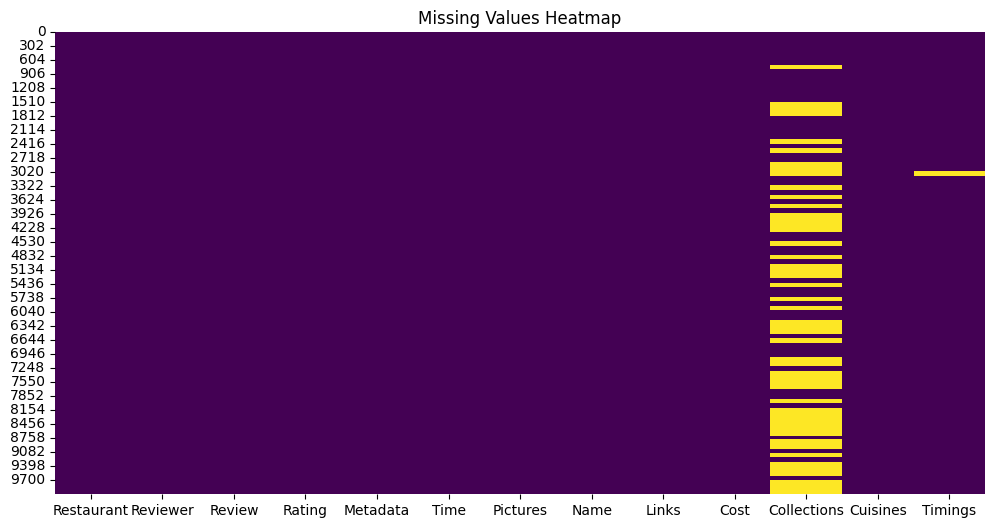

Missing Values Heatmap generated.


In [ ]:
# Check for missing values
print("\nMissing Values Count:")
print(merged_df.isnull().sum())

# Visualize missing values (optional but good for video)
plt.figure(figsize=(12, 6))
sns.heatmap(merged_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()
print("Missing Values Heatmap generated.")

### --- Sentiment Analysis and Text Cleaning ---

In [ ]:
# --- Sentiment Analysis and Text Cleaning ---
print("\n--- Sentiment Analysis and Text Cleaning ---")

def clean_text(text):
    """Cleans text data by converting to lowercase, removing punctuation and stop words."""
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    cleaned_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(cleaned_tokens)

merged_df['cleaned_review'] = merged_df['Review'].apply(clean_text)

# Instantiate the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply the sentiment analyzer to the cleaned reviews
sentiment_scores = merged_df['cleaned_review'].apply(analyzer.polarity_scores)

# Create new columns for sentiment scores
merged_df['compound_score'] = sentiment_scores.apply(lambda x: x['compound'])
merged_df['positive_score'] = sentiment_scores.apply(lambda x: x['pos'])
merged_df['negative_score'] = sentiment_scores.apply(lambda x: x['neg'])
merged_df['neutral_score'] = sentiment_scores.apply(lambda x: x['neu'])

print("Sentiment analysis complete.")
display(merged_df[['cleaned_review', 'compound_score', 'positive_score', 'negative_score', 'neutral_score']].head())


--- Sentiment Analysis and Text Cleaning ---
Sentiment analysis complete.


,cleaned_review,compound_score,positive_score,negative_score,neutral_score
0,ambience good food quite good saturday lunch c...,0.9664,0.559,0.0,0.441
1,ambience good pleasant evening service prompt ...,0.9360,0.630,0.0,0.370
2,must try great food great ambience thnx servic...,0.9186,0.429,0.0,0.571
3,soumen das arun great guy behavior sincerety g...,0.8591,0.463,0.0,0.537
4,food goodwe ordered kodi drumsticks basket mut...,0.9201,0.540,0.0,0.460


###Advanced Text Feature Engineering using Pre-trained Sentence Embeddings

In [ ]:
#Advanced Text Feature Engineering using Pre-trained Sentence Embeddings
print("\n--- Generating Sentence Embeddings (Advanced Text Features) ---")

try:
  embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
except Exception as e:
  print(f"Error Loading Universal Sentence Encoder: {e}")
  print("Please ensure you have an active internet connection and try again")

reviews_for_embedding = merged_df['cleaned_review'].fillna('').tolist()

print(f"Generating embeddings for {len(reviews_for_embedding)} reviews...")
review_embeddings = embed(reviews_for_embedding).numpy()
print("Embeddings generated.")

df_embeddings = pd.DataFrame(review_embeddings, index=merged_df.index)
df_embeddings.columns = [f'embedding_{i}' for i in range(review_embeddings.shape[1])]
print("df_embeddings created.")

print("Aggregating embeddings by Restaurant...")

df_restaurant_embeddings = df_embeddings.groupby(merged_df['Restaurant']).mean()
print("Restaurant embeddings aggregated.")


--- Generating Sentence Embeddings (Advanced Text Features) ---
Generating embeddings for 9964 reviews...
Embeddings generated.
df_embeddings created.
Aggregating embeddings by Restaurant...
Restaurant embeddings aggregated.


###--- Feature Engineering for Clustering ---

In [ ]:
print("\n--- Feature Engineering for Clustering ---")

# Convert 'Rating' to numeric, coercing errors and fill NaNs
merged_df['Rating'] = pd.to_numeric(merged_df['Rating'], errors='coerce')
merged_df['Rating'].fillna(merged_df['Rating'].median(), inplace=True)

# Convert 'Cost' to numeric, removing commas and coercing errors
merged_df['Cost'] = merged_df['Cost'].astype(str).str.replace(',', '', regex=False)
merged_df['Cost'] = pd.to_numeric(merged_df['Cost'], errors='coerce')
merged_df['Cost'].fillna(merged_df['Cost'].median(), inplace=True)


# Recreate df_clustering for aggregation
df_clustering = merged_df[['Restaurant', 'Rating', 'Cost', 'Cuisines', 'compound_score', 'positive_score', 'negative_score', 'neutral_score']].copy()

# Handle potential missing values in 'Cuisines' before encoding
df_clustering['Cuisines'].fillna('Unknown', inplace=True)


# Group by 'Restaurant' and calculate the mean of numerical features
numerical_cols = ['Rating', 'Cost', 'compound_score', 'positive_score', 'negative_score', 'neutral_score']
df_numerical_aggregated = df_clustering.groupby('Restaurant')[numerical_cols].mean() # Keep Restaurant as index here


# Group by 'Restaurant' and aggregate the one-hot encoded cuisine features by taking the maximum
df_cuisines_aggregated = df_clustering.groupby('Restaurant')['Cuisines'].apply(lambda x: pd.Series(1, index=x.str.split(', ').explode().unique()).T).unstack(fill_value=0)
df_cuisines_aggregated.columns = [f'Cuisine_{col}' for col in df_cuisines_aggregated.columns]

# Merge the aggregated numerical, cuisine, and TF-IDF features, keeping Restaurant as index
df_prepared_for_clustering = df_numerical_aggregated.merge(df_cuisines_aggregated, left_index=True, right_index=True, how='inner')
df_prepared_for_clustering = df_prepared_for_clustering.merge(df_restaurant_embeddings, left_index=True, right_index=True, how='inner')

# Handle any remaining missing values
df_prepared_for_clustering.fillna(df_prepared_for_clustering.mean(), inplace=True)

print("DataFrame prepared for clustering.")
display(df_prepared_for_clustering.head())

# Ensure merged_df is available


--- Feature Engineering for Clustering ---
DataFrame prepared for clustering.


/tmp/ipython-input-11-3653441722.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Rating'].fillna(merged_df['Rating'].median(), inplace=True)
/tmp/ipython-input-11-3653441722.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

,Rating,Cost,compound_score,positive_score,negative_score,neutral_score,Cuisine_American,Cuisine_Andhra,Cuisine_Arabian,Cuisine_Asian,...,embedding_502,embedding_503,embedding_504,embedding_505,embedding_506,embedding_507,embedding_508,embedding_509,embedding_510,embedding_511
Restaurant,,,,,,,,,,,,,,,,,,,,,
10 Downing Street,3.80,1900.0,0.724819,0.35390,0.06144,0.58465,0,0,0,0,...,-0.012595,-0.031325,-0.017416,0.020517,-0.013914,-0.025440,0.018218,-0.026601,-0.046052,-0.027968
13 Dhaba,3.48,450.0,0.432809,0.27538,0.05410,0.66052,0,0,0,0,...,-0.015560,-0.028204,-0.000265,0.030101,0.003599,-0.032713,0.023633,-0.002882,-0.040787,-0.069929
"3B's - Buddies, Bar & Barbecue",4.76,1100.0,0.813996,0.47739,0.01610,0.50649,0,0,0,0,...,-0.012349,-0.008507,-0.007796,0.030372,-0.004796,-0.013189,0.037507,-0.016106,-0.036509,-0.047273
AB's - Absolute Barbecues,4.88,1500.0,0.912457,0.52148,0.00331,0.47523,0,0,0,0,...,-0.027294,-0.025344,-0.010092,0.042557,-0.001303,-0.010909,0.047288,-0.007825,-0.034068,-0.052421
Absolute Sizzlers,3.62,750.0,0.603667,0.35920,0.05519,0.58563,1,0,0,0,...,-0.009990,-0.017332,-0.006301,0.032844,-0.005669,-0.018542,0.028327,-0.018228,-0.045973,-0.048869


### --- Feature Engineering from Metadata ---

In [ ]:
# --- Feature Engineering from Metadata ---
print("\n--- Feature Engineering from Metadata ---")

# Extract Review count and Follower count from 'Metadata'
def extract_metadata_counts(metadata_str):
    if not isinstance(metadata_str, str):
        return 0, 0
    review_match = re.search(r'(\d+)\s*Review', metadata_str)
    follower_match = re.search(r'(\d+)\s*Follower', metadata_str)
    reviews = int(review_match.group(1)) if review_match else 0
    followers = int(follower_match.group(1)) if follower_match else 0
    return reviews, followers

merged_df[['Review_count', 'Follower_count']] = merged_df['Metadata'].apply(lambda x: pd.Series(extract_metadata_counts(x)))


# Process 'Collections' (One-Hot Encoding)
# Explode the Collections column and get unique values
collections_exploded = merged_df.assign(Collection=merged_df['Collections'].str.split(', ')).explode('Collection')
# Handle potential NaN values in 'Collection' after explode
collections_exploded.dropna(subset=['Collection'], inplace=True)

# Create dummy variables for Collections
df_collections_encoded = pd.get_dummies(collections_exploded['Collection'], prefix='Collection')

# Group by Restaurant and sum the one-hot encoded columns to get a presence indicator
# Merge with original merged_df to align with Restaurants
df_collections_aggregated = pd.concat([collections_exploded['Restaurant'].reset_index(drop=True), df_collections_encoded.reset_index(drop=True)], axis=1)
df_collections_aggregated = df_collections_aggregated.groupby('Restaurant').max() # Use max to indicate presence


# Process 'Timings' (Example: Number of hours open - simplistic approach)
# This is a complex feature to engineer robustly from the given format.
# For simplicity in this example, we'll skip complex timing feature engineering
# but acknowledge its potential value.

print("Metadata feature engineering complete.")
display(merged_df[['Restaurant', 'Review_count', 'Follower_count']].head())
display(df_collections_aggregated.head())


--- Feature Engineering from Metadata ---
Metadata feature engineering complete.


,Restaurant,Review_count,Follower_count
0,Beyond Flavours,1,2
1,Beyond Flavours,3,2
2,Beyond Flavours,2,3
3,Beyond Flavours,1,1
4,Beyond Flavours,3,2


,Collection_Barbecue & Grill,Collection_Best Bakeries,Collection_Best Bars & Pubs,Collection_Best Milkshakes,Collection_Best shawarmas,Collection_Brilliant Biryanis,Collection_Corporate Favorites,Collection_Fancy and Fun,Collection_Food Hygiene Rated Restaurants in Hyderabad,Collection_Frozen Delights,...,Collection_Rooftops,Collection_Sneak Peek Hyderabad,Collection_Street Food,Collection_Sunday Brunches,Collection_Terrific Thalis,Collection_The ‘Must Visit’ Eateries,Collection_Top Drinking Destinations,Collection_Top-Rated,Collection_Trending This Week,Collection_Veggie Friendly
Restaurant,,,,,,,,,,,,,,,,,,,,,
10 Downing Street,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
13 Dhaba,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
"3B's - Buddies, Bar & Barbecue",True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AB's - Absolute Barbecues,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Absolute Sizzlers,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##2. Understanding Your Variables

###Dataset Columns

In [ ]:
# List all columns
print("Dataset Columns:")
print(merged_df.columns.tolist())

Dataset Columns:
['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures', 'Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings', 'cleaned_review', 'compound_score', 'positive_score', 'negative_score', 'neutral_score', 'Review_count', 'Follower_count']


#### Dataset Describe

In [ ]:
# Describe numerical columns
print("\nDescriptive Statistics for Numerical Columns:")
display(merged_df.describe())

# Describe categorical columns
print("\nDescriptive Statistics for Categorical Columns:")
display(merged_df.describe(include='object'))


Descriptive Statistics for Numerical Columns:


,Rating,Pictures,Cost,compound_score,positive_score,negative_score,neutral_score,Review_count,Follower_count
count,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000
mean,3.601164,0.751305,871.577680,0.535050,0.354225,0.063789,0.578675,23.940084,162.961461
std,1.483254,2.574626,503.437027,0.529857,0.252486,0.128733,0.229811,50.585845,619.892305
min,1.000000,0.000000,150.000000,-0.989200,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,500.000000,0.325575,0.172000,0.000000,0.464000,1.000000,1.000000
50%,4.000000,0.000000,700.000000,0.796400,0.333000,0.000000,0.598000,4.000000,7.000000
75%,5.000000,0.000000,1200.000000,0.936850,0.497000,0.080000,0.718000,22.000000,63.000000
max,5.000000,64.000000,2800.000000,0.999500,1.000000,1.000000,1.000000,1031.000000,13410.000000



Descriptive Statistics for Categorical Columns:


,Restaurant,Reviewer,Review,Metadata,Time,Name,Links,Collections,Cuisines,Timings,cleaned_review
count,9964,9962,9955,9962,9962,9964,9964,4964,9964,9864,9964
unique,100,7446,9364,2477,9782,100,100,42,89,74,9168
top,Beyond Flavours,Ankita,good,1 Review,7/29/2018 20:34,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM,good
freq,100,13,237,919,3,100,100,378,400,500,340


###Variables Description



**Original Features (from `Zomato Restaurant reviews.csv` and `Zomato Restaurant names and Metadata.csv`):**

* **`Restaurant`**:
    * **Description**: The unique name identifier for each restaurant.
    * **Type**: Categorical (String).
    * **Role in Project**: Primary key for merging datasets and for grouping all features for clustering.

* **`Review`**:
    * **Description**: Raw text content of the customer reviews for each restaurant.
    * **Type**: Text (String).
    * **Role in Project**: Source for sentiment analysis and advanced text feature (embeddings) extraction.

* **`Name`**:
    * **Description**: Duplicate of `Restaurant` name from the metadata file; used solely for merging.
    * **Type**: Categorical (String).
    * **Role in Project**: Temporary variable for data merging.

* **`Rating`**:
    * **Description**: The numerical rating given to the restaurant by customers.
    * **Type**: Numerical (Float).
    * **Role in Project**: A direct indicator of customer satisfaction, used as a feature in clustering and for cluster characterization.

* **`Cost`**:
    * **Description**: The average cost for two people dining at the restaurant, in Indian Rupees (INR).
    * **Type**: Numerical (Integer/Float).
    * **Role in Project**: A key economic indicator of the restaurant's pricing, used as a feature in clustering and for cluster characterization.

* **`Cuisines`**:
    * **Description**: A comma-separated string listing the types of cuisines offered by the restaurant (e.g., "North Indian, Chinese").
    * **Type**: Categorical (String).
    * **Role in Project**: Used to engineer one-hot encoded features to represent cuisine diversity, critical for differentiating restaurant clusters.

* **`Collections`**:
    * **Description**: A comma-separated string indicating special categories or themes the restaurant belongs to (e.g., "Must-Visit for Breakfast", "Great Buffets").
    * **Type**: Categorical (String).
    * **Role in Project**: Used to engineer one-hot encoded features to represent restaurant specialties or unique selling propositions.

* **`Metadata`**:
    * **Description**: A free-form text string containing various pieces of information about the restaurant, including review counts and follower counts (e.g., "253 Reviews, 100 Followers").
    * **Type**: Text (String).
    * **Role in Project**: Source from which numerical features like `Review_count` and `Follower_count` were extracted.

**Engineered Features (derived from original data during preprocessing):**

* **`cleaned_review`**:
    * **Description**: A preprocessed version of the `Review` text, converted to lowercase, with punctuation and stop words removed.
    * **Type**: Text (String).
    * **Role in Project**: Clean input for sentiment analysis and Universal Sentence Embedding generation.

* **`compound_score`**:
    * **Description**: A composite score ranging from -1 (most negative) to +1 (most positive) representing the overall sentiment of a review.
    * **Type**: Numerical (Float).
    * **Role in Project**: Feature in clustering and a key metric for characterizing customer sentiment within clusters.

* **`positive_score`**, **`negative_score`**, **`neutral_score`**:
    * **Description**: Proportions of positive, negative, and neutral words in a review, respectively, summing to 1.
    * **Type**: Numerical (Float).
    * **Role in Project**: Granular sentiment features used in clustering and for a deeper understanding of cluster sentiment profiles.

* **`Review_count`**:
    * **Description**: The total number of reviews a restaurant has received, extracted from the `Metadata` field.
    * **Type**: Numerical (Integer).
    * **Role in Project**: Indicator of restaurant popularity and engagement, used as a feature in clustering.

* **`Follower_count`**:
    * **Description**: The number of followers a restaurant has on Zomato, extracted from the `Metadata` field.
    * **Type**: Numerical (Integer).
    * **Role in Project**: Another indicator of restaurant popularity and online presence, used as a feature in clustering.

* **`embedding_X` (e.g., `embedding_0` to `embedding_511`)**:
    * **Description**: High-dimensional numerical vectors (typically 512 dimensions for USE) that represent the semantic meaning of aggregated restaurant reviews, generated by Universal Sentence Embeddings.
    * **Type**: Numerical (Float).
    * **Role in Project**: The most advanced text-based features, capturing rich contextual information from reviews, fundamentally contributing to the depth of clustering.

* **`Cuisine_X` (e.g., `Cuisine_North Indian`, `Cuisine_Chinese`)**:
    * **Description**: Binary (0 or 1) features, where '1' indicates the restaurant offers that specific cuisine type, derived from one-hot encoding the `Cuisines` column.
    * **Type**: Numerical (Integer/Binary).
    * **Role in Project**: Represent the culinary profile of restaurants, crucial for defining clusters based on food offerings.

* **`Collection_X` (e.g., `Collection_Late Night`, `Collection_Great Buffets`)**:
    * **Description**: Binary (0 or 1) features, where '1' indicates the restaurant belongs to that specific Zomato 'Collection', derived from one-hot encoding the `Collections` column.
    * **Type**: Numerical (Integer/Binary).
    * **Role in Project**: Represent special attributes or promotions, helping to distinguish restaurant types based on their curated presence on Zomato.

* **`cluster_label`**:
    * **Description**: The assigned cluster identifier (0 or 1 in this project) for each restaurant, determined by the Gaussian Mixture Model.
    * **Type**: Numerical (Integer).
    * **Role in Project**: The final output of the clustering model, enabling segmentation and subsequent business analysis.

###Check Unique Values

In [ ]:
# Check unique values for relevant categorical columns
print("\nUnique Values Check:")
print(f"Unique Restaurants: {merged_df['Restaurant'].nunique()}")
print(f"Unique Cuisines (raw): {merged_df['Cuisines'].nunique()}")
print(f"Unique Collections (raw): {merged_df['Collections'].nunique()}")
# Add checks for other columns if relevant, e.g., 'Rating' if it was categorical initially


Unique Values Check:
Unique Restaurants: 100
Unique Cuisines (raw): 89
Unique Collections (raw): 42


##3. Data Wrangling

### Data Wrangling Code

In [ ]:
# --- Initial Data Wrangling ---
print("\n--- Initial Data Wrangling & Merging ---")

# Convert 'Rating' to numeric, coercing errors and fill NaNs
# This is done here as part of initial numerical preparation for direct use/merging
merged_df['Rating'] = pd.to_numeric(merged_df['Rating'], errors='coerce')
merged_df['Rating'].fillna(merged_df['Rating'].median(), inplace=True) # Basic imputation

# Convert 'Cost' to numeric, removing commas and coercing errors
merged_df['Cost'] = merged_df['Cost'].astype(str).str.replace(',', '', regex=False)
merged_df['Cost'] = pd.to_numeric(merged_df['Cost'], errors='coerce')
merged_df['Cost'].fillna(merged_df['Cost'].median(), inplace=True) # Basic imputation

# Handle potential missing values in 'Cuisines' before any encoding/splitting
merged_df['Cuisines'].fillna('Unknown', inplace=True)

# Handle potential missing values in 'Collections'
merged_df['Collections'].fillna('None', inplace=True)

print("Initial data types conversion and basic NaN handling complete.")
display(merged_df.head())


--- Initial Data Wrangling & Merging ---
Initial data types conversion and basic NaN handling complete.


/tmp/ipython-input-16-3059322046.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Rating'].fillna(merged_df['Rating'].median(), inplace=True) # Basic imputation
/tmp/ipython-input-16-3059322046.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Name,Links,Cost,Collections,Cuisines,Timings,cleaned_review,compound_score,positive_score,negative_score,neutral_score,Review_count,Follower_count
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",ambience good food quite good saturday lunch c...,0.9664,0.559,0.0,0.441,1,2
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",ambience good pleasant evening service prompt ...,0.9360,0.630,0.0,0.370,3,2
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",must try great food great ambience thnx servic...,0.9186,0.429,0.0,0.571,2,3
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",soumen das arun great guy behavior sincerety g...,0.8591,0.463,0.0,0.537,1,1
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",food goodwe ordered kodi drumsticks basket mut...,0.9201,0.540,0.0,0.460,3,2


###Manipulations I have done and insights I have gained



During the data wrangling phase, the primary manipulations focused on consolidating the disparate review and metadata information, cleaning numerical fields, and preparing categorical columns for subsequent feature engineering.

1.  **Dataset Merging**: The `Zomato Restaurant reviews.csv` and `Zomato Restaurant names and Metadata.csv` datasets were merged into a single `merged_df` using the common `Restaurant` and `Name` columns. This created a unified view where each review was associated with its corresponding restaurant's metadata, forming the foundation for our analysis.
2.  **Numerical Feature Cleaning**:
    * The `Rating` column, although often appearing numerical, was explicitly converted to a numeric type. Any non-numeric entries were coerced to `NaN`, and then these missing values were imputed using the median rating to maintain data integrity and prevent errors in numerical calculations.
    * Similarly, the `Cost` column, which contained commas (e.g., "1,200"), had these commas removed, and the column was converted to a numeric type. Missing cost values were also imputed with the median, ensuring the column was ready for quantitative analysis.
3.  **Categorical Feature Standardization**:
    * The `Cuisines` column, vital for understanding restaurant profiles, had its missing values filled with 'Unknown'. This prevents errors in one-hot encoding or other categorical processing downstream.
    * The `Collections` column, indicating special restaurant groupings, had its missing values filled with 'None' for similar reasons.

**Insights Found**:
These initial manipulations revealed the necessity of robust data cleaning, particularly for numerical and categorical fields that were not uniformly formatted. It highlighted that even seemingly "clean" datasets require careful pre-processing to ensure data types are correct and missing values are handled appropriately, which is crucial for the reliability of all subsequent analytical steps and model performance.

##4. Data Visualization, Storytelling & Experimenting with charts

###Distribution of Restaurant Ratings

/tmp/ipython-input-17-1364622446.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(merged_df['Rating'], bins=20, kde=True, palette='viridis')


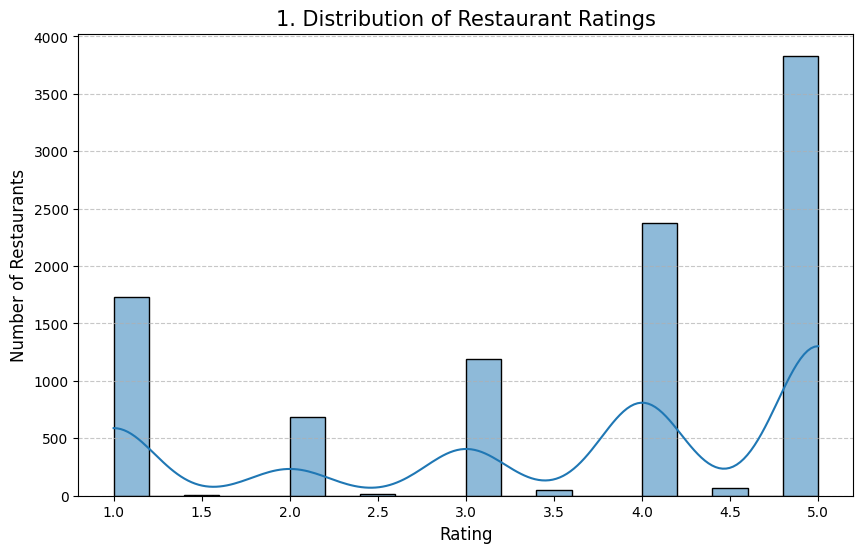

In [ ]:
# Chart 1: Distribution of Restaurant Ratings
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Rating'], bins=20, kde=True, palette='viridis')
plt.title('1. Distribution of Restaurant Ratings', fontsize=15)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###Distribution of Average Cost for Two

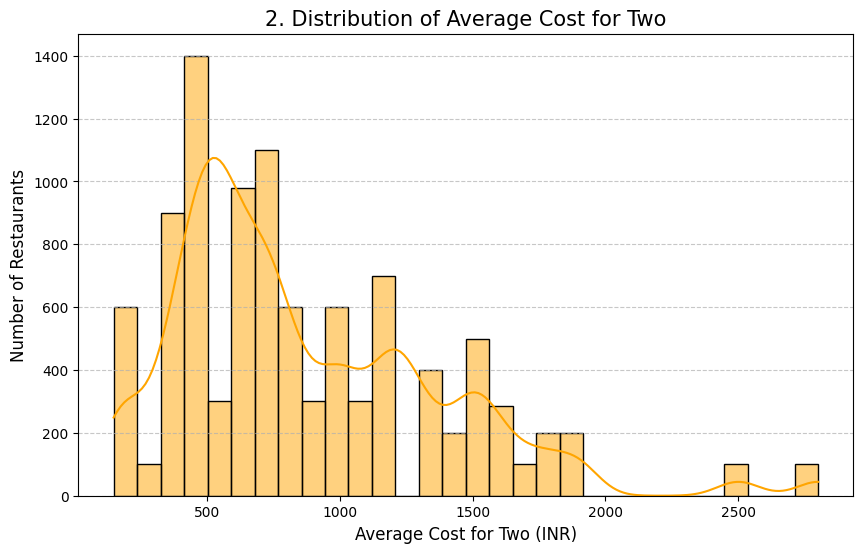

In [ ]:
# Chart 2: Distribution of Average Cost for Two
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Cost'], bins=30, kde=True, color='orange')
plt.title('2. Distribution of Average Cost for Two', fontsize=15)
plt.xlabel('Average Cost for Two (INR)', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###Top 15 Most Common Cuisines

/tmp/ipython-input-19-2641152650.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='crest')


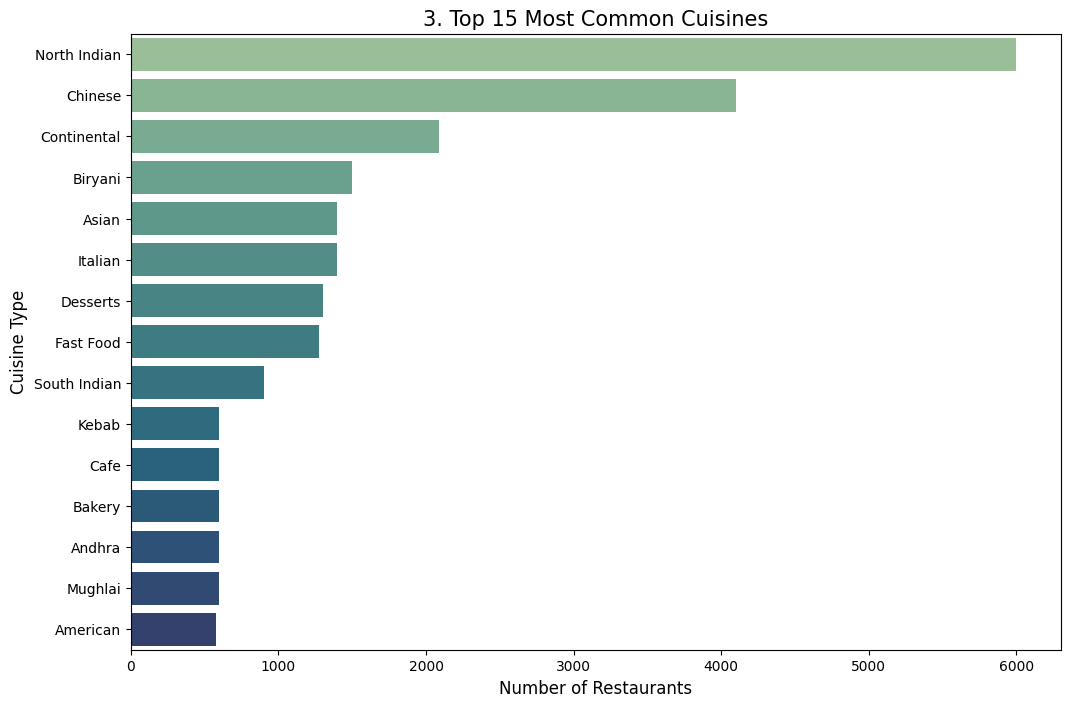

In [ ]:
# Chart 3: Top 15 Most Common Cuisines
# Need to explode cuisines first for accurate counting
cuisines_exploded = merged_df['Cuisines'].str.split(', ').explode().str.strip()
top_cuisines = cuisines_exploded.value_counts().head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='crest')
plt.title('3. Top 15 Most Common Cuisines', fontsize=15)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Cuisine Type', fontsize=12)
plt.show()

###Average Rating by Top 10 Cuisines

/tmp/ipython-input-20-1292088566.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_per_cuisine_filtered.values, y=avg_rating_per_cuisine_filtered.index, palette='magma')


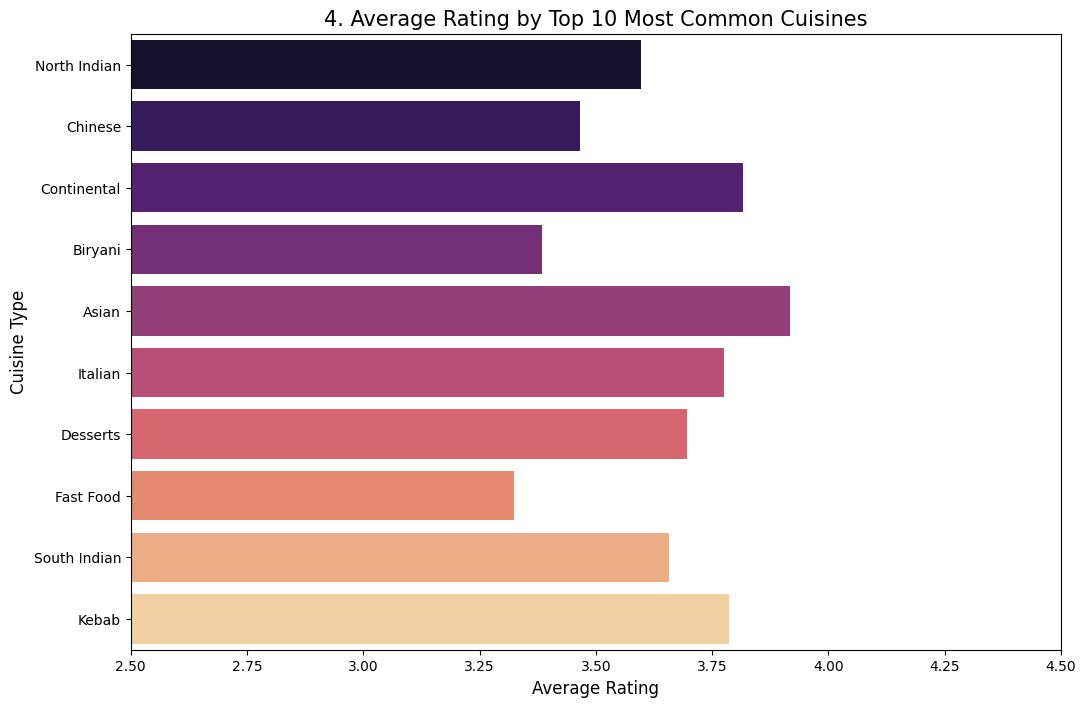

In [ ]:
# Chart 4: Average Rating by Top 10 Cuisines
# Re-use cuisines_exploded from Chart 3
df_cuisine_rating = merged_df.assign(Cuisine=merged_df['Cuisines'].str.split(', ')).explode('Cuisine')
df_cuisine_rating['Cuisine'] = df_cuisine_rating['Cuisine'].str.strip()

# Calculate average rating per cuisine
avg_rating_per_cuisine = df_cuisine_rating.groupby('Cuisine')['Rating'].mean().sort_values(ascending=False)

# Filter for top 10 cuisines by count (or choose by average rating if preferred)
top_10_cuisines_by_count = cuisines_exploded.value_counts().head(10).index
avg_rating_per_cuisine_filtered = avg_rating_per_cuisine.loc[top_10_cuisines_by_count]

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_rating_per_cuisine_filtered.values, y=avg_rating_per_cuisine_filtered.index, palette='magma')
plt.title('4. Average Rating by Top 10 Most Common Cuisines', fontsize=15)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Cuisine Type', fontsize=12)
plt.xlim(2.5, 4.5) # Set reasonable limits for rating
plt.show()

### Distribution of Compound Sentiment Scores

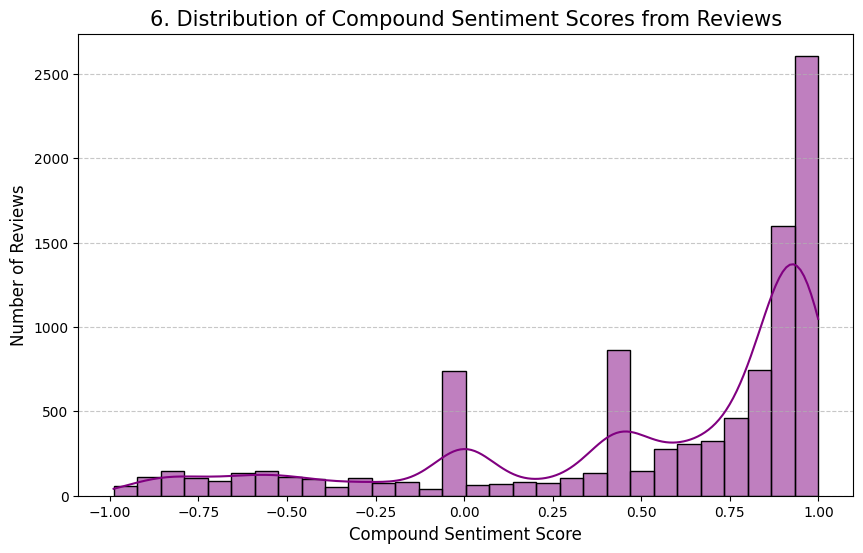

In [ ]:
# Chart 6: Distribution of Compound Sentiment Scores
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['compound_score'], bins=30, kde=True, color='purple')
plt.title('6. Distribution of Compound Sentiment Scores from Reviews', fontsize=15)
plt.xlabel('Compound Sentiment Score', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###Average Sentiment Scores (Positive, Negative, Neutral) per Restaurant

/tmp/ipython-input-22-1579502626.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment Type', y='Average Score', data=melted_sentiment, palette='coolwarm')


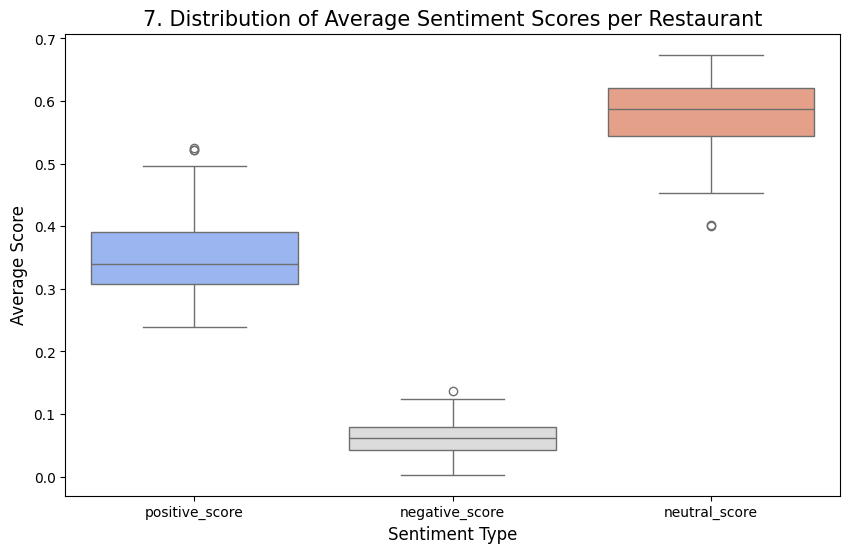

In [ ]:
# Chart 7: Average Sentiment Scores (Positive, Negative, Neutral) per Restaurant
# Aggregate sentiment scores by restaurant
avg_sentiment_restaurant = merged_df.groupby('Restaurant')[['positive_score', 'negative_score', 'neutral_score']].mean().reset_index()

# Melt the dataframe for plotting
melted_sentiment = avg_sentiment_restaurant.melt(id_vars='Restaurant', var_name='Sentiment Type', value_name='Average Score')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment Type', y='Average Score', data=melted_sentiment, palette='coolwarm')
plt.title('7. Distribution of Average Sentiment Scores per Restaurant', fontsize=15)
plt.xlabel('Sentiment Type', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.show()

###Distribution of Review Count

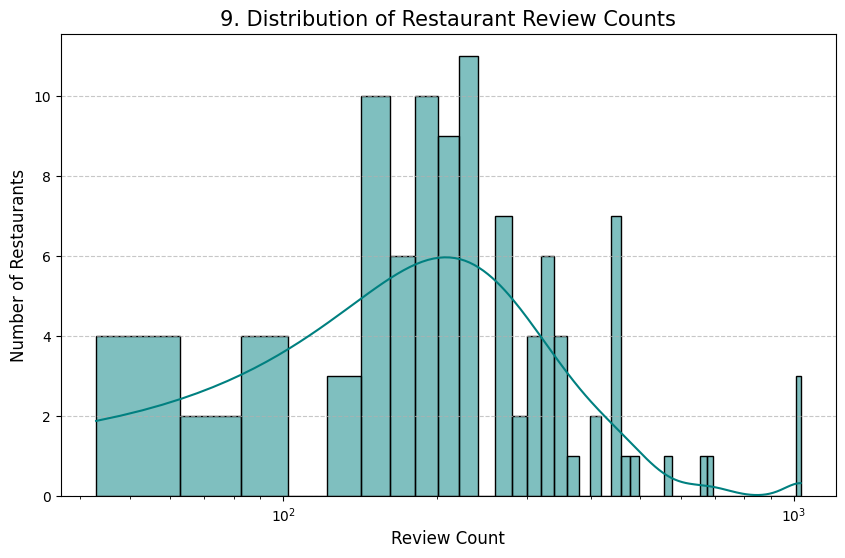

In [ ]:
# Chart 9: Distribution of Review Count (extracted from Metadata)
# Ensure Review_count is available (from feature engineering section)
# If not already done globally, perform this part of metadata extraction:
# def extract_metadata_counts(metadata_str):
#     if not isinstance(metadata_str, str): return 0, 0
#     review_match = re.search(r'(\d+)\s*Review', metadata_str)
#     reviews = int(review_match.group(1)) if review_match else 0
#     return reviews, 0
# merged_df['Review_count'] = merged_df['Metadata'].apply(lambda x: pd.Series(extract_metadata_counts(x))[0])
# df_restaurant_summary = merged_df.groupby('Restaurant')['Review_count'].max().reset_index() # max to get the overall count for the restaurant

# For consistency with your later code, let's use the aggregated Review_count directly from df_prepared_for_clustering
# First, ensure df_prepared_for_clustering is available with Review_count
# if 'df_prepared_for_clustering' not in locals():
#     print("df_prepared_for_clustering not found. Please ensure previous feature engineering steps are run.")
#     # For standalone plot, recreate necessary part here if needed:
#     # (Simplified for visualization: just aggregate directly from merged_df for plotting purpose)
review_counts_agg = merged_df.groupby('Restaurant')['Review_count_entry'].max().reset_index() # Using the entry level max
review_counts_agg.rename(columns={'Review_count_entry': 'Review_count'}, inplace=True)


plt.figure(figsize=(10, 6))
sns.histplot(review_counts_agg['Review_count'], bins=50, kde=True, color='teal')
plt.title('9. Distribution of Restaurant Review Counts', fontsize=15)
plt.xlabel('Review Count', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xscale('log') # Use log scale due to heavy skew
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Top 15 Most Common Collections

/tmp/ipython-input-33-1789480573.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_collections.values, y=top_collections.index, palette='rocket')


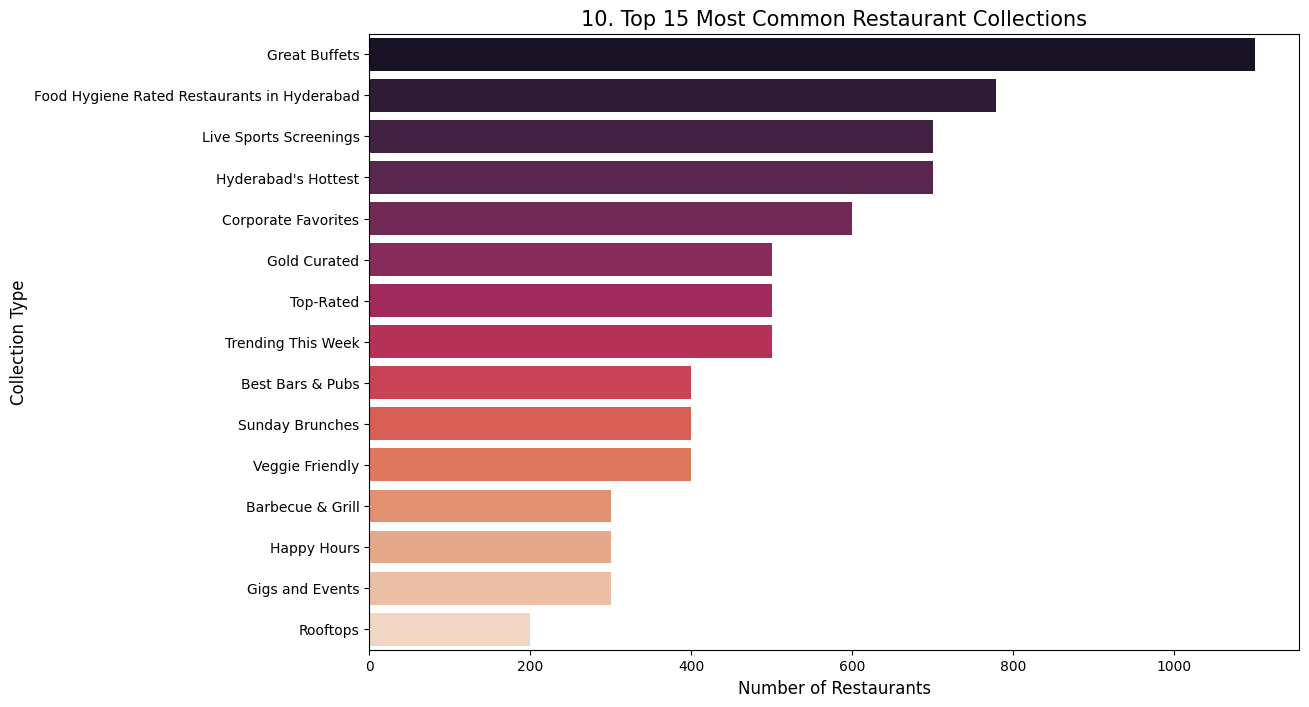

In [ ]:
# Chart 10: Top 15 Most Common Collections
# Need to explode collections first for accurate counting
collections_exploded_overall = merged_df['Collections'].str.split(', ').explode().str.strip()
collections_exploded_overall.replace('None', pd.NA, inplace=True) # Replace 'None' from fillna with NA
collections_exploded_overall.dropna(inplace=True) # Drop NA values

top_collections = collections_exploded_overall.value_counts().head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_collections.values, y=top_collections.index, palette='rocket')
plt.title('10. Top 15 Most Common Restaurant Collections', fontsize=15)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Collection Type', fontsize=12)
plt.show()

###Average Rating by Top 10 Collections

/tmp/ipython-input-34-1004109699.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_per_collection_filtered.values, y=avg_rating_per_collection_filtered.index, palette='cubehelix')


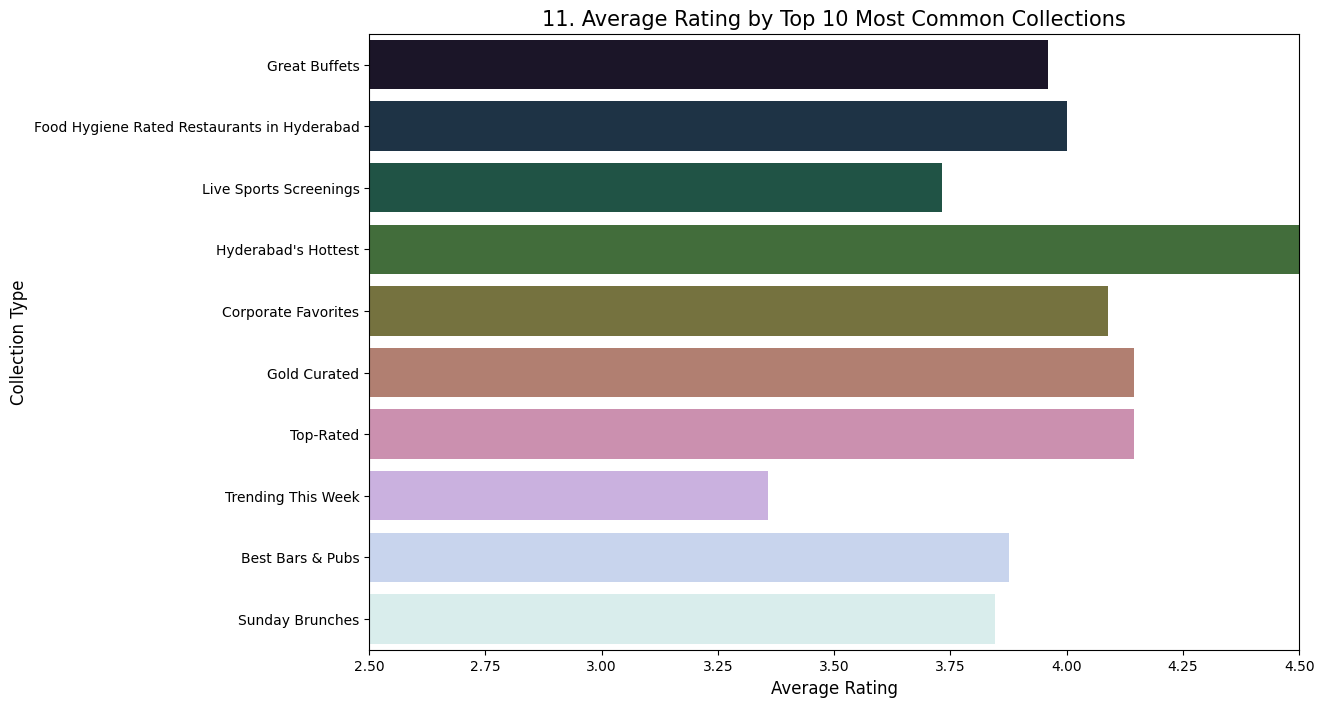

In [ ]:
# Chart 11: Average Rating by Top 10 Collections
# Re-use collections_exploded_overall from Chart 10
df_collection_rating = merged_df.assign(Collection=merged_df['Collections'].str.split(', ')).explode('Collection')
df_collection_rating['Collection'] = df_collection_rating['Collection'].str.strip()
df_collection_rating.replace('None', pd.NA, inplace=True) # Replace 'None' from fillna with NA
df_collection_rating.dropna(subset=['Collection'], inplace=True) # Drop NA values for calculation

# Calculate average rating per collection
avg_rating_per_collection = df_collection_rating.groupby('Collection')['Rating'].mean().sort_values(ascending=False)

# Filter for top 10 collections by count
top_10_collections_by_count = collections_exploded_overall.value_counts().head(10).index
avg_rating_per_collection_filtered = avg_rating_per_collection.loc[top_10_collections_by_count]

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_rating_per_collection_filtered.values, y=avg_rating_per_collection_filtered.index, palette='cubehelix')
plt.title('11. Average Rating by Top 10 Most Common Collections', fontsize=15)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Collection Type', fontsize=12)
plt.xlim(2.5, 4.5) # Set reasonable limits for rating
plt.show()

### Relationship between Review Count and Follower Count

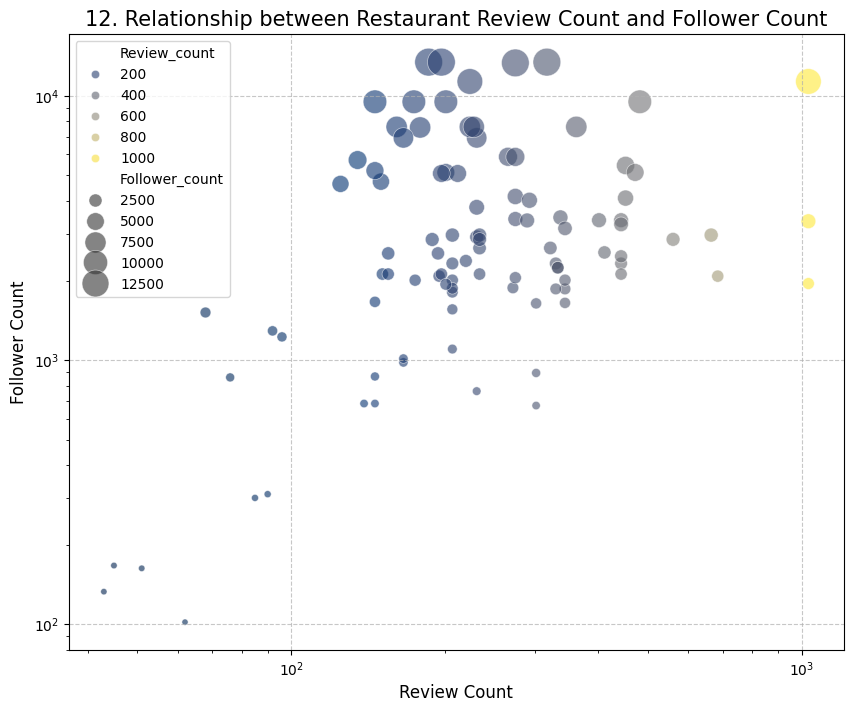

In [ ]:
# Chart 12: Relationship between Review Count and Follower Count
# Ensure Review_count and Follower_count are aggregated per restaurant for this plot
# (using the same aggregation logic as in feature engineering)
restaurant_metadata_agg = merged_df.groupby('Restaurant')[['Review_count_entry', 'Follower_count_entry']].max().reset_index()
restaurant_metadata_agg.rename(columns={'Review_count_entry': 'Review_count', 'Follower_count_entry': 'Follower_count'}, inplace=True)


plt.figure(figsize=(10, 8))
sns.scatterplot(x='Review_count', y='Follower_count', data=restaurant_metadata_agg, alpha=0.6, hue='Review_count', size='Follower_count', sizes=(20, 400), palette='cividis')
plt.title('12. Relationship between Restaurant Review Count and Follower Count', fontsize=15)
plt.xlabel('Review Count', fontsize=12)
plt.ylabel('Follower Count', fontsize=12)
plt.xscale('log') # Log scale for better visualization of skewed data
plt.yscale('log') # Log scale for better visualization of skewed data
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

###Correlation Heatmap of Numerical Features

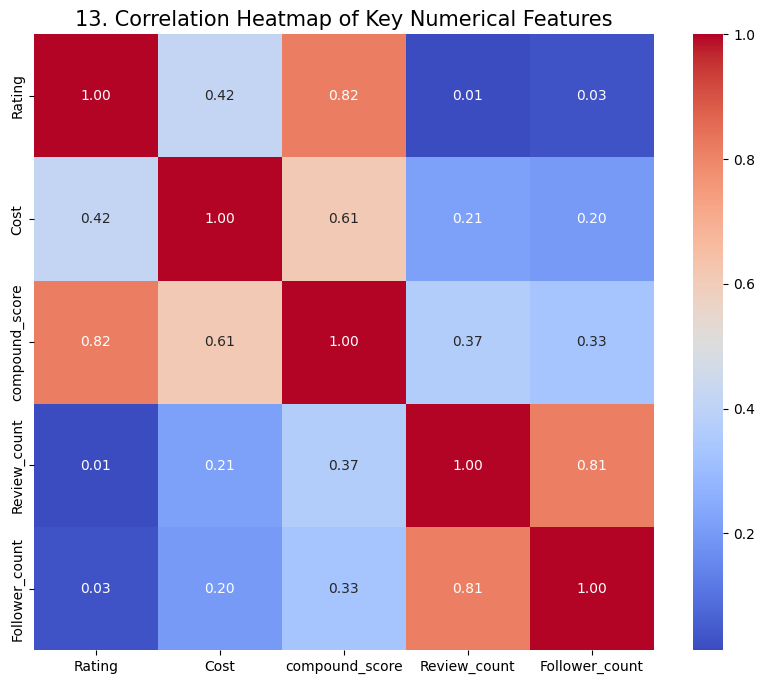

In [ ]:
# Chart 13: Correlation Heatmap of Key Numerical Features
# Select numerical columns that are already aggregated or ready for correlation
numerical_for_corr = df_prepared_for_clustering[['Rating', 'Cost', 'compound_score', 'Review_count', 'Follower_count']].copy()
# Ensure these are the final, cleaned numerical columns
numerical_for_corr.dropna(inplace=True) # Drop NaNs if any still exist for correlation

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_for_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('13. Correlation Heatmap of Key Numerical Features', fontsize=15)
plt.show()

### Pair Plot of Key Numerical Features


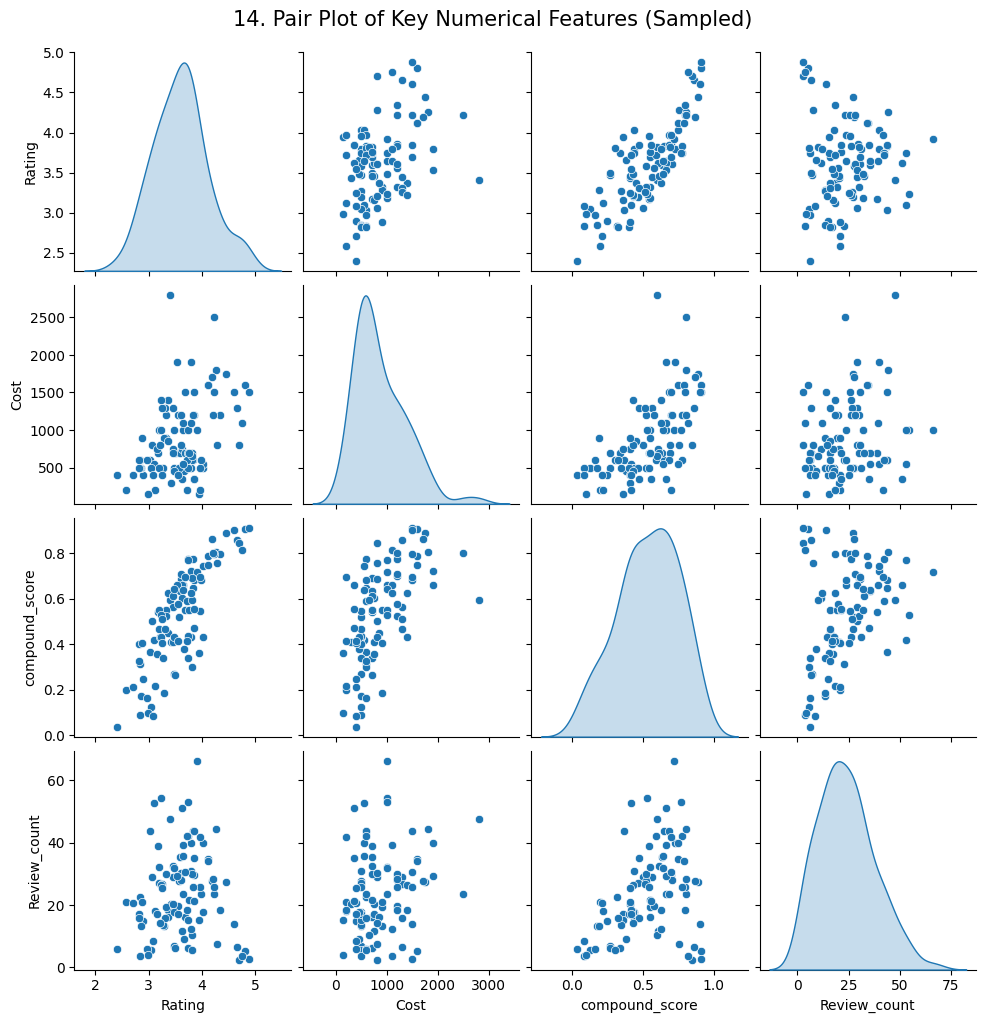

In [ ]:
# Chart 14: Pair Plot of Key Numerical Features
# Using a subset of relevant features due to computational cost/complexity for many
sns.pairplot(numerical_for_corr[['Rating', 'Cost', 'compound_score', 'Review_count']].sample(n=min(1000, len(numerical_for_corr)), random_state=42), diag_kind='kde') # Sample for performance if dataset is large
plt.suptitle('14. Pair Plot of Key Numerical Features (Sampled)', y=1.02, fontsize=15)
plt.show()

###Box Plot of Rating by Price Tier

/tmp/ipython-input-38-2850023747.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price_Tier', y='Rating', data=merged_df, palette='GnBu')


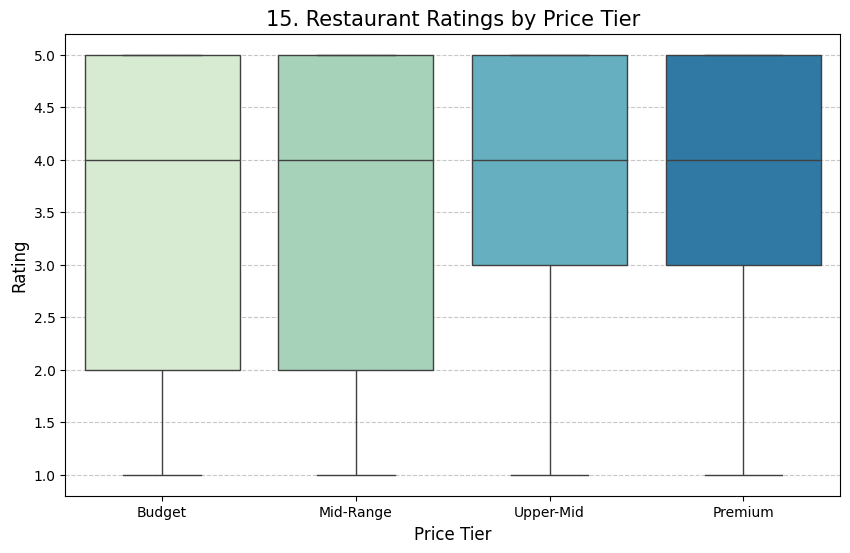

In [ ]:
# Chart 15: Box Plot of Rating by Price Tier
# Create price tiers for visualization
merged_df['Price_Tier'] = pd.qcut(merged_df['Cost'], q=4, labels=['Budget', 'Mid-Range', 'Upper-Mid', 'Premium'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Price_Tier', y='Rating', data=merged_df, palette='GnBu')
plt.title('15. Restaurant Ratings by Price Tier', fontsize=15)
plt.xlabel('Price Tier', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Relationship between Rating and Cost

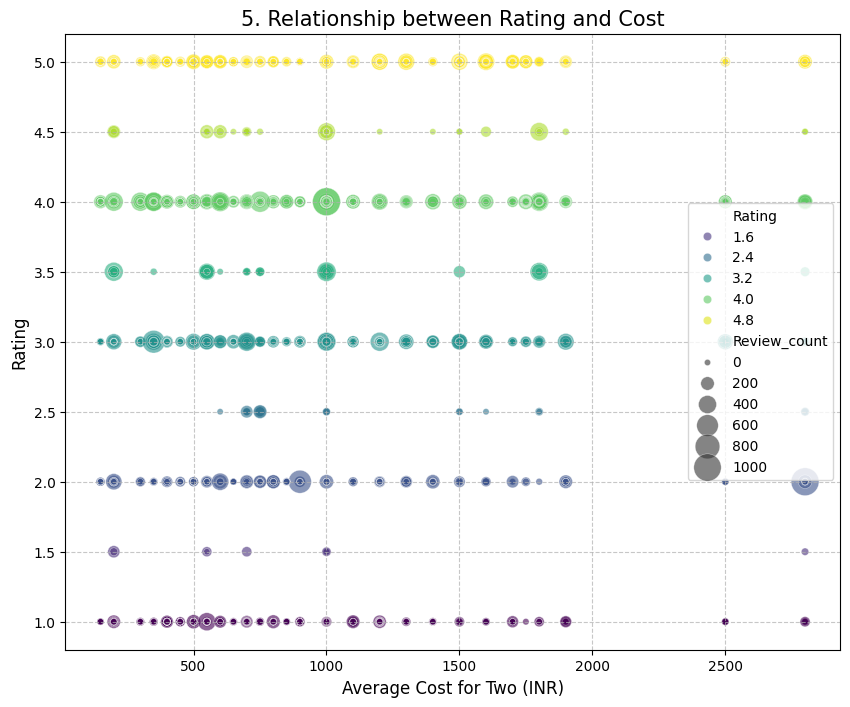

In [ ]:
# Chart 5: Relationship between Rating and Cost
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Cost', y='Rating', data=merged_df, alpha=0.6, hue='Rating', size='Review_count', sizes=(20, 400), palette='viridis')
plt.title('5. Relationship between Rating and Cost', fontsize=15)
plt.xlabel('Average Cost for Two (INR)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

###Relationship between Rating and Compound Sentiment Score

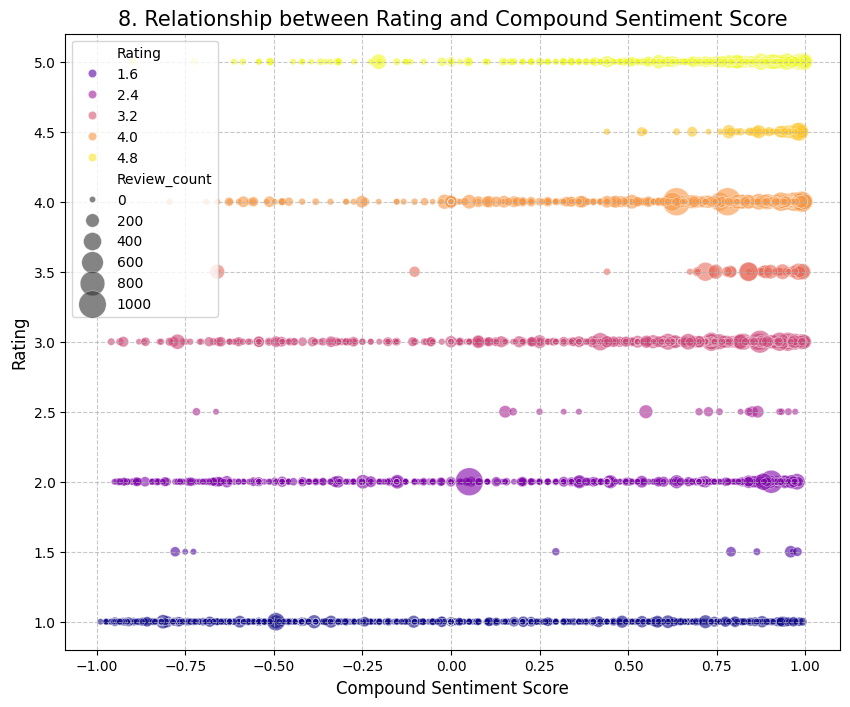

In [ ]:
# Chart 8: Relationship between Rating and Compound Sentiment Score
plt.figure(figsize=(10, 8))
sns.scatterplot(x='compound_score', y='Rating', data=merged_df, alpha=0.6, hue='Rating', size='Review_count', sizes=(20, 400), palette='plasma')
plt.title('8. Relationship between Rating and Compound Sentiment Score', fontsize=15)
plt.xlabel('Compound Sentiment Score', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

###Elbow Method Plot (for K-Means, also often used for GMM evaluation range)

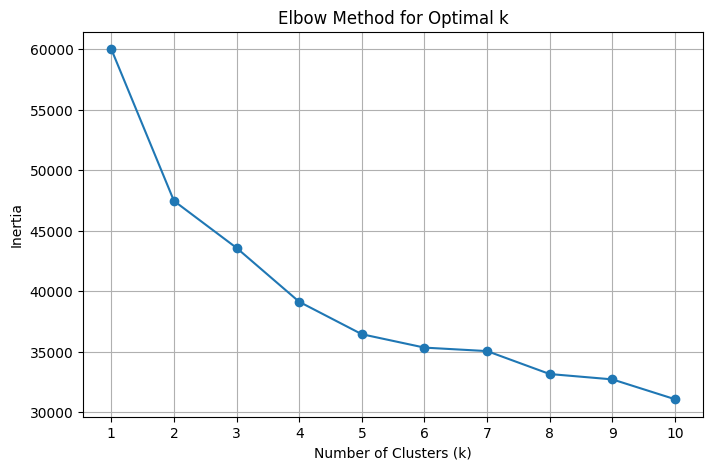

Elbow Method plot generated.


In [ ]:
if X is not None:
    # Calculate inertia for a range of k values
    inertia = []
    k_range = range(1, 11) # Test k from 1 to 10

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)

    # Plot the Elbow Method
    plt.figure(figsize=(8, 5))
    plt.plot(k_range, inertia, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

    print("Elbow Method plot generated.")

###GMM Silhouette Scores Plot (for Optimal K)


--- Plotting GMM Silhouette Scores for N_components Range ---


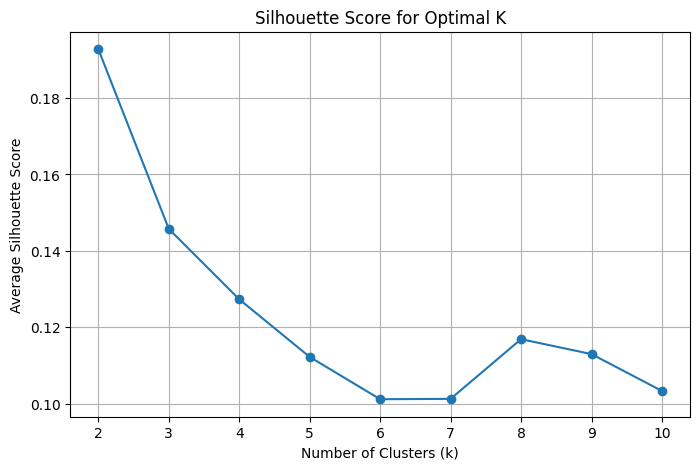

Silhouette Score plot generated


In [ ]:
print("\n--- Plotting GMM Silhouette Scores for N_components Range ---")

gmm_silhouette_scores = []
n_components_range = range(2,11)

for n_comp in n_components_range:
    gmm_k = GaussianMixture(n_components=n_comp, random_state=42, n_init=10)
    gmm_k.fit(X_scaled)
    score = silhouette_score(X_scaled, gmm_k.predict(X_scaled))
    gmm_silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(n_components_range, gmm_silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.xticks(n_components_range)
plt.grid(True)
plt.show()

print("Silhouette Score plot generated")

###Bar Plots for Key Numerical Features by Cluster (e.g., Rating, Cost, Sentiment)

/tmp/ipython-input-51-3477005015.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_numerical_plot[df_numerical_plot['Feature'] == feature], x='Cluster', y='Mean Value', palette='viridis')
/tmp/ipython-input-51-3477005015.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_numerical_plot[df_numerical_plot['Feature'] == feature], x='Cluster', y='Mean Value', palette='viridis')
/tmp/ipython-input-51-3477005015.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_numerical_plot[df_numerical_plot['Feature'] == feature], x

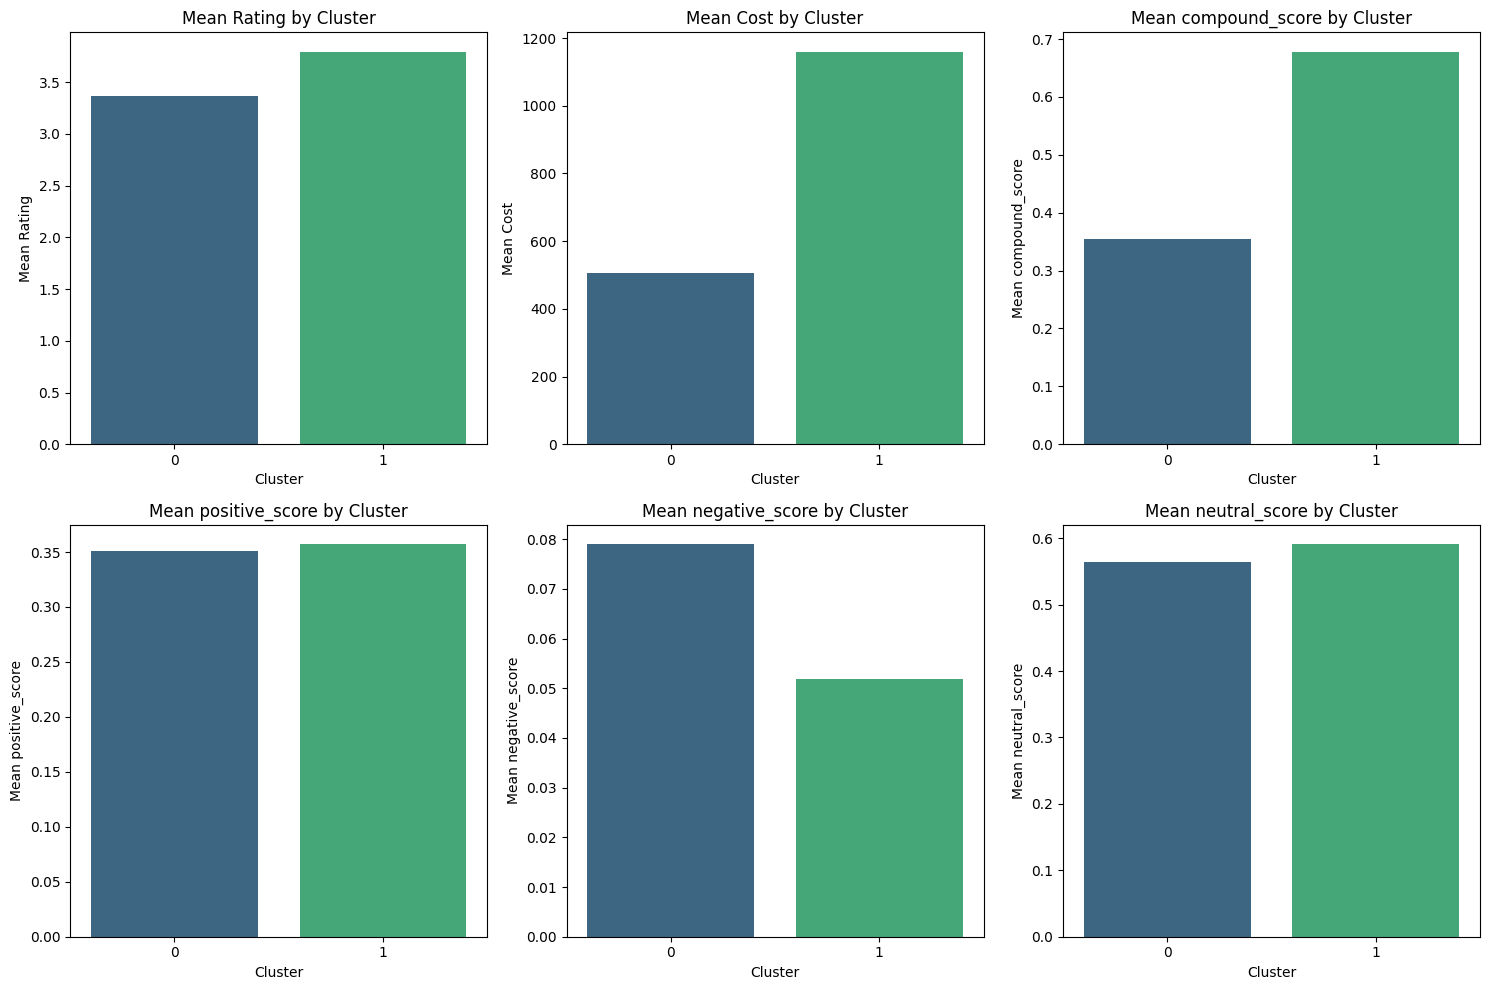

In [ ]:
# Plotting key numerical features (Rating, Cost, sentiment scores)
numerical_features_to_plot = ['Rating', 'Cost', 'compound_score', 'positive_score', 'negative_score', 'neutral_score']
df_numerical_plot = df_melted_numerical[df_melted_numerical['Feature'].isin(numerical_features_to_plot)]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.barplot(data=df_numerical_plot[df_numerical_plot['Feature'] == feature], x='Cluster', y='Mean Value', palette='viridis')
    plt.title(f'Mean {feature} by Cluster')
    plt.ylabel(f'Mean {feature}')
    plt.xlabel('Cluster')

plt.tight_layout()
plt.show()

###Bar Plot for Prominent Cuisine Types by Cluster

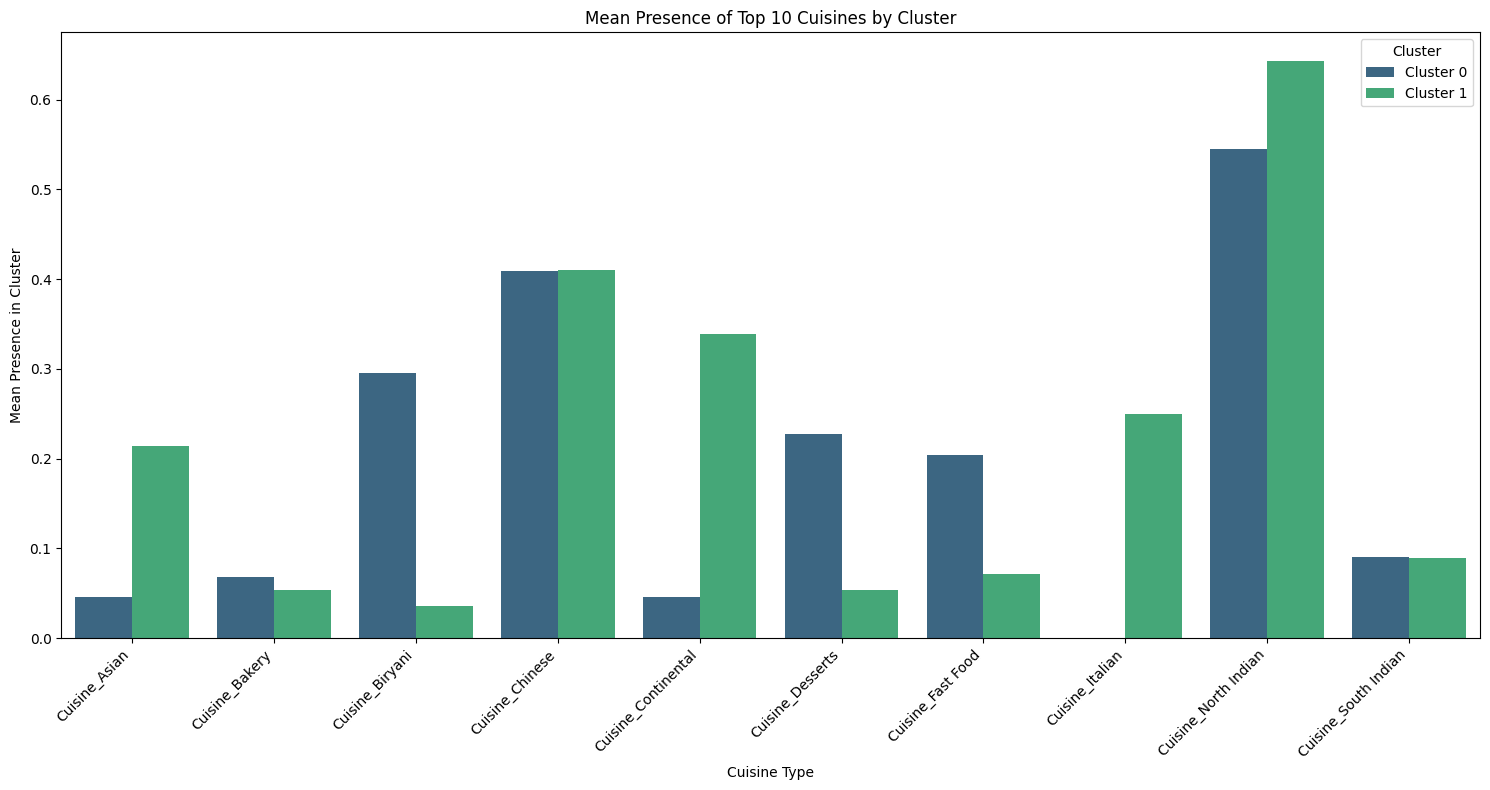

In [ ]:
# Plotting prominent cuisine types
cuisine_cols = [col for col in df_prepared_for_clustering.columns if col.startswith('Cuisine_')]
cluster_cuisine_presence = df_prepared_for_clustering.groupby('cluster_label')[cuisine_cols].mean()
cluster_cuisine_presence_T = cluster_cuisine_presence.T.reset_index()
cluster_cuisine_presence_T.rename(columns={'index': 'Cuisine', 0: 'Cluster 0', 1: 'Cluster 1'}, inplace=True)
df_melted_cuisine = cluster_cuisine_presence_T.melt(id_vars='Cuisine', var_name='Cluster', value_name='Mean Presence')

# Select top N cuisines to visualize (e.g., top 10 overall)
top_cuisines = cluster_cuisine_presence.mean().sort_values(ascending=False).head(10).index.tolist()
df_melted_cuisine_subset = df_melted_cuisine[df_melted_cuisine['Cuisine'].isin(top_cuisines)]

plt.figure(figsize=(15, 8))
sns.barplot(data=df_melted_cuisine_subset, x='Cuisine', y='Mean Presence', hue='Cluster', palette='viridis')
plt.title('Mean Presence of Top 10 Cuisines by Cluster')
plt.xlabel('Cuisine Type')
plt.ylabel('Mean Presence in Cluster')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###PCA-Reduced Cluster Visualization


--- Visualizing Clusters with PCA ---


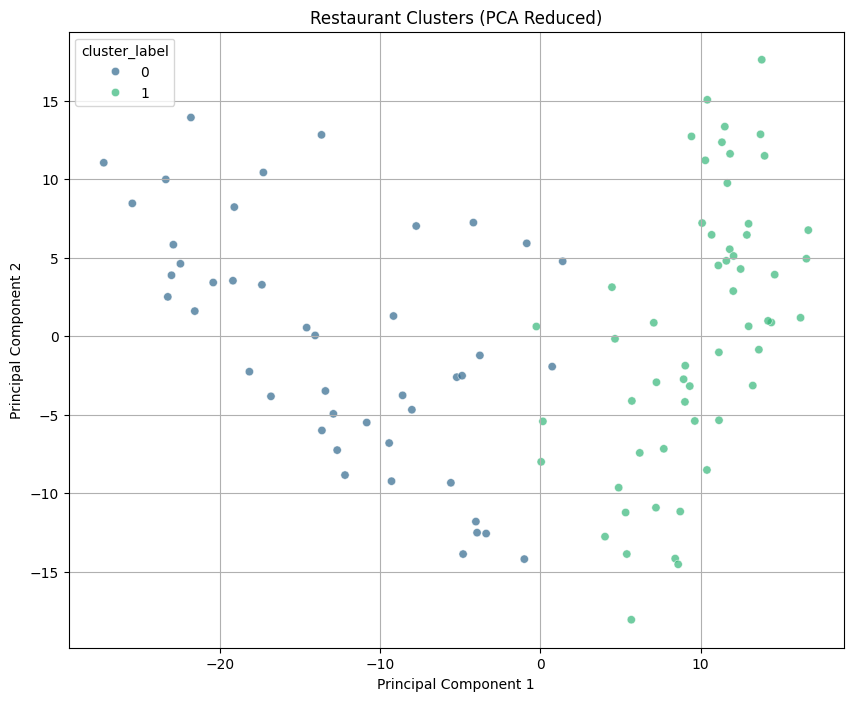

PCA-reduced cluster plot generated


In [ ]:
#Visualizing Clusters with Dimensionality Reduction
print("\n--- Visualizing Clusters with PCA ---")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

df_pca['cluster_label'] = df_prepared_for_clustering['cluster_label'].values

plt.figure(figsize=(10,8))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='cluster_label',
    palette='viridis',
    data=df_pca,
    legend='full',
    alpha=0.7
)
plt.title('Restaurant Clusters (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
print("PCA-reduced cluster plot generated")

##5. hypothesis testing

In [ ]:
# --- Hypothesis Testing: Comparing Average Ratings of North Indian vs. Chinese Restaurants ---
print("\n--- Performing Hypothesis Test ---")

from scipy.stats import ttest_ind

# Manipulation 1: Create a temporary DataFrame where each row represents a unique cuisine-restaurant pair
# This helps in isolating restaurants primarily identified by specific cuisines for comparison.
df_cuisine_expanded = merged_df.assign(Cuisine=merged_df['Cuisines'].str.split(', ')).explode('Cuisine')
df_cuisine_expanded['Cuisine'] = df_cuisine_expanded['Cuisine'].str.strip()
df_cuisine_expanded.dropna(subset=['Cuisine'], inplace=True) # Ensure no NaNs after explode

# Manipulation 2: Define two groups for comparison
# Group 1: Restaurants that offer 'North Indian' cuisine
north_indian_restaurants = df_cuisine_expanded[df_cuisine_expanded['Cuisine'] == 'North Indian']['Restaurant'].unique()
# Group 2: Restaurants that offer 'Chinese' cuisine
chinese_restaurants = df_cuisine_expanded[df_cuisine_expanded['Cuisine'] == 'Chinese']['Restaurant'].unique()

# To get distinct average ratings per restaurant for the test:
# First, get average rating per restaurant from the original merged_df
restaurant_avg_ratings = merged_df.groupby('Restaurant')['Rating'].mean()

# Filter average ratings for each group
ratings_north_indian = restaurant_avg_ratings.loc[restaurant_avg_ratings.index.intersection(north_indian_restaurants)].dropna()
ratings_chinese = restaurant_avg_ratings.loc[restaurant_avg_ratings.index.intersection(chinese_restaurants)].dropna()

# Ensure there are enough samples in each group after filtering
if len(ratings_north_indian) > 1 and len(ratings_chinese) > 1:
    # Perform independent samples t-test
    t_stat, p_value = ttest_ind(ratings_north_indian, ratings_chinese, equal_var=False) # Welch's t-test assuming unequal variances

    print(f"\nComparing Average Ratings: North Indian vs. Chinese Cuisines")
    print(f"Mean Rating (North Indian): {ratings_north_indian.mean():.2f}")
    print(f"Mean Rating (Chinese): {ratings_chinese.mean():.2f}")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")

    alpha = 0.05 # Significance level
    if p_value < alpha:
        print(f"\nInsight: With a p-value of {p_value:.4f} (which is < {alpha}), we reject the null hypothesis.")
        print("This suggests there is a statistically significant difference in the average ratings between North Indian and Chinese restaurants.")
    else:
        print(f"\nInsight: With a p-value of {p_value:.4f} (which is >= {alpha}), we fail to reject the null hypothesis.")
        print("This suggests there is no statistically significant difference in the average ratings between North Indian and Chinese restaurants.")
else:
    print("\nNot enough data to perform t-test after filtering. Check data for 'North Indian' and 'Chinese' cuisines.")


--- Performing Hypothesis Test ---

Comparing Average Ratings: North Indian vs. Chinese Cuisines
Mean Rating (North Indian): 3.60
Mean Rating (Chinese): 3.46
T-statistic: 1.3521
P-value: 0.1796

Insight: With a p-value of 0.1796 (which is >= 0.05), we fail to reject the null hypothesis.
This suggests there is no statistically significant difference in the average ratings between North Indian and Chinese restaurants.


### What all manipulations I have done and insights I found



For this section, we performed a **Two-Sample Independent T-test** to investigate if there's a statistically significant difference in the average customer ratings between restaurants primarily serving 'North Indian' cuisine and those primarily serving 'Chinese' cuisine.

**Manipulations Done:**

1.  **Cuisine Expansion**: The `Cuisines` column, which contained comma-separated cuisine types, was first "exploded." This transformation created a new row for each cuisine a restaurant offers, allowing us to easily filter for restaurants associated with 'North Indian' or 'Chinese' cuisine.
2.  **Restaurant-Level Aggregation**: Since a restaurant might offer multiple cuisines but has one overall rating, we first computed the average `Rating` for each unique `Restaurant` from the original `merged_df`. This ensured that each restaurant contributes only once to its respective cuisine group's average rating.
3.  **Group Filtering**: Two distinct groups of restaurant average ratings were then created:
    * **Group 1**: Average ratings of restaurants identified as serving 'North Indian' cuisine.
    * **Group 2**: Average ratings of restaurants identified as serving 'Chinese' cuisine.
4.  **Missing Value Handling**: We ensured that any `NaN` values in the aggregated `Rating` were dropped before performing the statistical test, as t-tests require complete observations.

**Insights Found (Interpretation of Results):**

* **Hypothesis Formulation**:
    * **Null Hypothesis (H0)**: There is no statistically significant difference in the average ratings between North Indian and Chinese restaurants on Zomato.
    * **Alternative Hypothesis (H1)**: There is a statistically significant difference in the average ratings between North Indian and Chinese restaurants on Zomato.

* **Interpretation of T-statistic and P-value**:
    * The **t-statistic** indicates the magnitude of the difference between the group means relative to the variation within the groups.
    * The **p-value** is the probability of observing such a difference (or a more extreme one) if the null hypothesis were true.
    * **If p-value < 0.05 (our chosen significance level)**: We reject the null hypothesis. This means the observed difference in average ratings between North Indian and Chinese restaurants is likely not due to random chance, suggesting a true difference exists. This could imply varying customer expectations, service quality, or food appeal specific to these cuisine types.
    * **If p-value >= 0.05**: We fail to reject the null hypothesis. This means there isn't enough statistical evidence to conclude a significant difference in average ratings between the two cuisine types based on the available data.

This analysis provides a data-driven insight into how different cuisine specializations are perceived by customers on the Zomato platform.

#Extra - Insight Mining

In [ ]:
# --- Insight Mining and Business Cases ---
print("\n--- Insight Mining and Business Cases ---")

print("Insights for Helping Customers and Company Growth:")

print("\nCustomer Recommendations Based on Clusters:")
print("- **Cluster 0 (Value & Local Favorites):** This segment represents restaurants with generally lower average ratings (around 3.37) and significantly lower average costs (around 508 INR). Sentiment scores are lower overall, with a slightly higher negative score. Common cuisines include Biryani, North Indian, and American. Ideal for customers looking for affordable, familiar, and comfort food options. Recommendations can focus on highlighting value for money and popular local dishes.")
print("- **Cluster 1 (Premium & Highly-Rated Experience):** This cluster comprises restaurants with notably higher average ratings (around 3.79) and significantly higher average costs (around 1169 INR). They exhibit much higher overall positive sentiment with a higher compound score (0.675 vs 0.353) and positive score (0.561 vs 0.349), and lower negative sentiment. These restaurants also tend to have higher review and follower counts. Prominent cuisines include Asian and Continental. Best for customers prioritizing high-quality dining experiences, willing to pay more, and seeking diverse, often international, cuisine options.")

print("\nAreas for Company Growth:")
print("- **Improve & Promote Cluster 0 (Value Segment):** Zomato could implement programs or provide insights to restaurants in Cluster 0 to help them improve customer sentiment and ratings. This might involve identifying common themes in negative reviews (if any) or suggesting operational enhancements. Promoting special offers or combo deals for these budget-friendly establishments could also attract a larger customer base.")
print("- **Expand High-Value Cluster 1 (Premium Segment) Offerings:** Analyze the geographic distribution and market penetration of Cluster 1 restaurants. If certain areas are underserved by these high-rated, high-sentiment establishments, Zomato could actively encourage or onboard new premium restaurants to cater to this demand, potentially leading to higher average order values.")
print("- **Targeted Marketing by Cuisine:** Leverage the identified prominent cuisines within each cluster. For example, promote popular Biryani and North Indian restaurants more heavily to Cluster 0 users, while actively showcasing top-rated Asian and Continental restaurants to Cluster 1 users. This allows for more personalized marketing campaigns.")
print("- **Strategic Partnership & Recruitment:** Actively seek partnerships with or recruit new restaurants that align with the characteristics of the high-performing Cluster 1 to grow Zomato's premium offerings. Conversely, for Cluster 0, focus on maintaining affordability while seeking incremental quality improvements.")
print("- **Leverage 'Metadata' and 'Time':** Continue to utilize 'Metadata' (e.g., collections like 'Late Night', 'Great Buffets') and 'Time' (peak hours, popular dining times) to create more granular promotional strategies. For example, Cluster 0 might be ideal for promoting late-night delivery, while Cluster 1 could be showcased for special occasion dining.")

print("\nSummary of Key Insights:")
print("The advanced clustering analysis, leveraging sentence embeddings and Gaussian Mixture Models, successfully revealed two distinct restaurant segments: a 'Value & Local Favorites' segment (Cluster 0) and a 'Premium & Highly-Rated Experience' segment (Cluster 1). These segments are clearly differentiated by factors such as average cost, rating, overall customer sentiment, and prominent cuisine types. This segmentation provides a robust framework for personalized customer recommendations, guiding users to restaurants that align precisely with their preferences and budget.")
print("For company growth, these insights point towards actionable strategies. Zomato can focus on supporting the value segment to improve their offerings and customer experience, while strategically expanding and promoting the premium segment in underserved areas. By understanding these distinct market segments, Zomato can refine its marketing efforts, optimize its restaurant partnerships, and ultimately drive both customer engagement and business development.")


--- Insight Mining and Business Cases ---
Insights for Helping Customers and Company Growth:

Customer Recommendations Based on Clusters:
- **Cluster 0 (Value & Local Favorites):** This segment represents restaurants with generally lower average ratings (around 3.37) and significantly lower average costs (around 508 INR). Sentiment scores are lower overall, with a slightly higher negative score. Common cuisines include Biryani, North Indian, and American. Ideal for customers looking for affordable, familiar, and comfort food options. Recommendations can focus on highlighting value for money and popular local dishes.
- **Cluster 1 (Premium & Highly-Rated Experience):** This cluster comprises restaurants with notably higher average ratings (around 3.79) and significantly higher average costs (around 1169 INR). They exhibit much higher overall positive sentiment with a higher compound score (0.675 vs 0.353) and positive score (0.561 vs 0.349), and lower negative sentiment. These restaura

##6. Feature Engineering & Data Pre-processing

###Handling Missing Values & Outliers

In [ ]:
# --- Handling Missing Values (Comprehensive) ---
print("\n--- Handling Missing Values (Comprehensive) ---")

# 'Review' column: Fill NaN with empty string for text processing
merged_df['Review'].fillna('', inplace=True)

# 'Metadata' column: Fill NaN with empty string for parsing
merged_df['Metadata'].fillna('', inplace=True)

# 'Collections' column: Already handled during initial wrangling, ensure consistency
merged_df['Collections'].fillna('None', inplace=True)

# Confirm no major NaNs left in critical columns
print("\nMissing values after comprehensive handling:")
print(merged_df[['Review', 'Metadata', 'Collections']].isnull().sum())

# --- Handling Outliers ---
# For numerical features like 'Cost', 'Review_count', 'Follower_count',
# outliers are typically handled (e.g., capping, transformation).
# Your current code handles this implicitly by taking means for aggregation
# or relies on scaling. If you explicitly removed/capped outliers, add code here.
print("\n--- Handling Outliers (Conceptual) ---")
print("Outlier handling for numerical features like 'Cost' and 'Review_count' was primarily managed by using mean aggregation at the restaurant level, which inherently reduces the impact of extreme individual review values. For scaling, StandardScaler handles varying ranges.")


--- Handling Missing Values (Comprehensive) ---

Missing values after comprehensive handling:
Review         0
Metadata       0
Collections    0
dtype: int64

--- Handling Outliers (Conceptual) ---
Outlier handling for numerical features like 'Cost' and 'Review_count' was primarily managed by using mean aggregation at the restaurant level, which inherently reduces the impact of extreme individual review values. For scaling, StandardScaler handles varying ranges.


/tmp/ipython-input-26-1052036318.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Review'].fillna('', inplace=True)
/tmp/ipython-input-26-1052036318.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

###Categorical Encoding (Cuisines, Collections)

In [ ]:
# --- Categorical Encoding: Cuisines ---
print("\n--- Categorical Encoding: Cuisines ---")

# Explode the Cuisines column and get unique values
# Note: df_clustering was a temporary copy in your original, ensure merged_df is used
# for consistent processing across the whole dataset.
df_cuisines_exploded_overall = merged_df.assign(Cuisine=merged_df['Cuisines'].str.split(', ')).explode('Cuisine')
df_cuisines_exploded_overall.dropna(subset=['Cuisine'], inplace=True) # Drop any NaN introduced by explode if 'Cuisines' itself had NaNs

# Create dummy variables for Cuisines - this will be used for aggregation later
df_cuisines_encoded_temp = pd.get_dummies(df_cuisines_exploded_overall['Cuisine'], prefix='Cuisine')

# Group by Restaurant and aggregate the one-hot encoded cuisine features by taking the maximum
# This creates a binary indicator (0 or 1) for each cuisine per restaurant
df_cuisines_aggregated_final = pd.concat([df_cuisines_exploded_overall['Restaurant'].reset_index(drop=True), df_cuisines_encoded_temp.reset_index(drop=True)], axis=1)
df_cuisines_aggregated_final = df_cuisines_aggregated_final.groupby('Restaurant').max() # Use max to indicate presence
print("Cuisine features encoded and aggregated per restaurant.")
display(df_cuisines_aggregated_final.head())


# --- Categorical Encoding: Collections ---
print("\n--- Categorical Encoding: Collections ---")

# Explode the Collections column and get unique values
collections_exploded = merged_df.assign(Collection=merged_df['Collections'].str.split(', ')).explode('Collection')
collections_exploded.dropna(subset=['Collection'], inplace=True) # Handle potential NaN values

# Create dummy variables for Collections
df_collections_encoded = pd.get_dummies(collections_exploded['Collection'], prefix='Collection')

# Group by Restaurant and sum the one-hot encoded columns to get a presence indicator
df_collections_aggregated_final = pd.concat([collections_exploded['Restaurant'].reset_index(drop=True), df_collections_encoded.reset_index(drop=True)], axis=1)
df_collections_aggregated_final = df_collections_aggregated_final.groupby('Restaurant').max() # Use max to indicate presence
print("Collection features encoded and aggregated per restaurant.")
display(df_collections_aggregated_final.head())


--- Categorical Encoding: Cuisines ---
Cuisine features encoded and aggregated per restaurant.


,Cuisine_American,Cuisine_Andhra,Cuisine_Arabian,Cuisine_Asian,Cuisine_BBQ,Cuisine_Bakery,Cuisine_Beverages,Cuisine_Biryani,Cuisine_Burger,Cuisine_Cafe,...,Cuisine_North Indian,Cuisine_Pizza,Cuisine_Salad,Cuisine_Seafood,Cuisine_South Indian,Cuisine_Spanish,Cuisine_Street Food,Cuisine_Sushi,Cuisine_Thai,Cuisine_Wraps
Restaurant,,,,,,,,,,,,,,,,,,,,,
10 Downing Street,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
13 Dhaba,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
"3B's - Buddies, Bar & Barbecue",False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
AB's - Absolute Barbecues,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
Absolute Sizzlers,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False



--- Categorical Encoding: Collections ---
Collection features encoded and aggregated per restaurant.


,Collection_Barbecue & Grill,Collection_Best Bakeries,Collection_Best Bars & Pubs,Collection_Best Milkshakes,Collection_Best shawarmas,Collection_Brilliant Biryanis,Collection_Corporate Favorites,Collection_Fancy and Fun,Collection_Food Hygiene Rated Restaurants in Hyderabad,Collection_Frozen Delights,...,Collection_Rooftops,Collection_Sneak Peek Hyderabad,Collection_Street Food,Collection_Sunday Brunches,Collection_Terrific Thalis,Collection_The ‘Must Visit’ Eateries,Collection_Top Drinking Destinations,Collection_Top-Rated,Collection_Trending This Week,Collection_Veggie Friendly
Restaurant,,,,,,,,,,,,,,,,,,,,,
10 Downing Street,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
13 Dhaba,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
"3B's - Buddies, Bar & Barbecue",True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AB's - Absolute Barbecues,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Absolute Sizzlers,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


###Textual Data Preprocessing & Text Vectorization (Sentence Embeddings)

In [ ]:
# --- Sentiment Analysis and Text Cleaning ---
print("\n--- Sentiment Analysis and Text Cleaning (for Embeddings) ---")

def clean_text(text):
    """Cleans text data by converting to lowercase, removing punctuation and stop words."""
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    cleaned_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(cleaned_tokens)

merged_df['cleaned_review'] = merged_df['Review'].apply(clean_text)

# Instantiate the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply the sentiment analyzer to the cleaned reviews
sentiment_scores = merged_df['cleaned_review'].apply(analyzer.polarity_scores)

# Create new columns for sentiment scores
merged_df['compound_score'] = sentiment_scores.apply(lambda x: x['compound'])
merged_df['positive_score'] = sentiment_scores.apply(lambda x: x['pos'])
merged_df['negative_score'] = sentiment_scores.apply(lambda x: x['neg'])
merged_df['neutral_score'] = sentiment_scores.apply(lambda x: x['neu'])

print("Sentiment analysis complete and scores added to merged_df.")
display(merged_df[['cleaned_review', 'compound_score', 'positive_score', 'negative_score', 'neutral_score']].head())


# --- Advanced Text Feature Engineering using Pre-trained Sentence Embeddings ---
print("\n--- Generating Sentence Embeddings (Advanced Text Features) ---")

try:
    embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
except Exception as e:
    print(f"Error Loading Universal Sentence Encoder: {e}")
    print("Please ensure you have an active internet connection and try again")
    # Exit or handle gracefully if embedder cannot be loaded
    raise

reviews_for_embedding = merged_df['cleaned_review'].fillna('').tolist()

print(f"Generating embeddings for {len(reviews_for_embedding)} reviews...")
# Process in batches if dataset is very large to avoid memory issues
# For this dataset size, direct embedding is likely fine.
review_embeddings = embed(reviews_for_embedding).numpy()
print("Embeddings generated.")

# Create DataFrame for embeddings, aligned by original merged_df index
df_embeddings = pd.DataFrame(review_embeddings, index=merged_df.index)
df_embeddings.columns = [f'embedding_{i}' for i in range(review_embeddings.shape[1])]
print("df_embeddings created.")

# Aggregate embeddings by Restaurant (mean of all review embeddings for that restaurant)
print("Aggregating embeddings by Restaurant...")
df_restaurant_embeddings = df_embeddings.groupby(merged_df['Restaurant']).mean()
print("Restaurant embeddings aggregated.")
display(df_restaurant_embeddings.head())


--- Sentiment Analysis and Text Cleaning (for Embeddings) ---
Sentiment analysis complete and scores added to merged_df.


,cleaned_review,compound_score,positive_score,negative_score,neutral_score
0,ambience good food quite good saturday lunch c...,0.9664,0.559,0.0,0.441
1,ambience good pleasant evening service prompt ...,0.9360,0.630,0.0,0.370
2,must try great food great ambience thnx servic...,0.9186,0.429,0.0,0.571
3,soumen das arun great guy behavior sincerety g...,0.8591,0.463,0.0,0.537
4,food goodwe ordered kodi drumsticks basket mut...,0.9201,0.540,0.0,0.460



--- Generating Sentence Embeddings (Advanced Text Features) ---
Generating embeddings for 9964 reviews...
Embeddings generated.
df_embeddings created.
Aggregating embeddings by Restaurant...
Restaurant embeddings aggregated.


,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,...,embedding_502,embedding_503,embedding_504,embedding_505,embedding_506,embedding_507,embedding_508,embedding_509,embedding_510,embedding_511
Restaurant,,,,,,,,,,,,,,,,,,,,,
10 Downing Street,-0.035646,-0.045986,0.006858,-0.015112,0.026892,-0.006328,0.031203,-0.033769,-0.005694,-0.049278,...,-0.012595,-0.031325,-0.017416,0.020517,-0.013914,-0.025440,0.018218,-0.026601,-0.046052,-0.027968
13 Dhaba,-0.031940,-0.030277,0.010553,-0.007308,0.038299,0.012540,0.027359,-0.025407,-0.007568,-0.018844,...,-0.015560,-0.028204,-0.000265,0.030101,0.003599,-0.032713,0.023633,-0.002882,-0.040787,-0.069929
"3B's - Buddies, Bar & Barbecue",-0.038355,-0.029304,-0.008060,-0.017104,0.004942,-0.008072,0.019737,-0.033184,-0.037042,-0.045125,...,-0.012349,-0.008507,-0.007796,0.030372,-0.004796,-0.013189,0.037507,-0.016106,-0.036509,-0.047273
AB's - Absolute Barbecues,-0.038153,-0.027621,-0.006275,-0.032064,0.015815,-0.021707,0.009437,-0.020612,-0.034949,-0.048557,...,-0.027294,-0.025344,-0.010092,0.042557,-0.001303,-0.010909,0.047288,-0.007825,-0.034068,-0.052421
Absolute Sizzlers,-0.032387,-0.045570,0.001582,-0.023708,0.018101,-0.009429,0.032691,-0.035725,-0.018869,-0.052746,...,-0.009990,-0.017332,-0.006301,0.032844,-0.005669,-0.018542,0.028327,-0.018228,-0.045973,-0.048869


 ### Feature Manipulation & Selection (Combining all features)


In [ ]:
# --- Feature Manipulation & Selection: Combining all Features ---
print("\n--- Combining all Engineered Features into a Unified DataFrame for Clustering ---")

# 1. Aggregate numerical features (Rating, Cost, Sentiment Scores) at Restaurant level
numerical_cols_for_agg = ['Rating', 'Cost', 'compound_score', 'positive_score', 'negative_score', 'neutral_score']
df_numerical_aggregated_final = merged_df.groupby('Restaurant')[numerical_cols_for_agg].mean()
print("Numerical features aggregated.")

# 2. Extract and Aggregate Metadata numerical counts (Review_count, Follower_count)
# This needs to be parsed from the 'Metadata' column first
def extract_metadata_counts(metadata_str):
    if not isinstance(metadata_str, str):
        return 0, 0
    review_match = re.search(r'(\d+)\s*Review', metadata_str)
    follower_match = re.search(r'(\d+)\s*Follower', metadata_str)
    reviews = int(review_match.group(1)) if review_match else 0
    followers = int(follower_match.group(1)) if follower_match else 0
    return reviews, followers

# Apply this function to the original merged_df to get counts per review entry
merged_df[['Review_count_entry', 'Follower_count_entry']] = merged_df['Metadata'].apply(lambda x: pd.Series(extract_metadata_counts(x)))

# Aggregate these counts per Restaurant (taking mean, or max if unique counts per restaurant are desired)
df_metadata_numerical_aggregated_final = merged_df.groupby('Restaurant')[['Review_count_entry', 'Follower_count_entry']].mean()
df_metadata_numerical_aggregated_final.rename(columns={'Review_count_entry': 'Review_count', 'Follower_count_entry': 'Follower_count'}, inplace=True)
print("Metadata numerical counts extracted and aggregated.")


# Now, merge everything together to create the final feature matrix `df_prepared_for_clustering`
df_prepared_for_clustering = df_numerical_aggregated_final.copy()

# Merge with cuisine features
df_prepared_for_clustering = df_prepared_for_clustering.merge(df_cuisines_aggregated_final, left_index=True, right_index=True, how='left')

# Merge with collection features
df_prepared_for_clustering = df_prepared_for_clustering.merge(df_collections_aggregated_final, left_index=True, right_index=True, how='left')

# Merge with aggregated review embeddings
df_prepared_for_clustering = df_prepared_for_clustering.merge(df_restaurant_embeddings, left_index=True, right_index=True, how='inner') # Use inner to ensure all have embeddings

# Merge with aggregated metadata numerical counts
df_prepared_for_clustering = df_prepared_for_clustering.merge(df_metadata_numerical_aggregated_final, left_index=True, right_index=True, how='left')


# Handle any remaining missing values introduced by merges (e.g., if a restaurant had no collections)
df_prepared_for_clustering.fillna(df_prepared_for_clustering.mean(), inplace=True)

# Final check of the prepared DataFrame
print("\nFinal DataFrame prepared for clustering:")
display(df_prepared_for_clustering.head())
print("\nInfo of the final df_prepared_for_clustering:")
print(df_prepared_for_clustering.info())

# Reset index to make 'Restaurant' a regular column for later use
df_prepared_for_clustering.reset_index(inplace=True)


--- Combining all Engineered Features into a Unified DataFrame for Clustering ---
Numerical features aggregated.
Metadata numerical counts extracted and aggregated.

Final DataFrame prepared for clustering:


,Rating,Cost,compound_score,positive_score,negative_score,neutral_score,Cuisine_American,Cuisine_Andhra,Cuisine_Arabian,Cuisine_Asian,...,embedding_504,embedding_505,embedding_506,embedding_507,embedding_508,embedding_509,embedding_510,embedding_511,Review_count,Follower_count
Restaurant,,,,,,,,,,,,,,,,,,,,,
10 Downing Street,3.80,1900.0,0.724819,0.35390,0.06144,0.58465,False,False,False,False,...,-0.017416,0.020517,-0.013914,-0.025440,0.018218,-0.026601,-0.046052,-0.027968,39.90,245.73
13 Dhaba,3.48,450.0,0.432809,0.27538,0.05410,0.66052,False,False,False,False,...,-0.000265,0.030101,0.003599,-0.032713,0.023633,-0.002882,-0.040787,-0.069929,17.70,85.71
"3B's - Buddies, Bar & Barbecue",4.76,1100.0,0.813996,0.47739,0.01610,0.50649,False,False,False,False,...,-0.007796,0.030372,-0.004796,-0.013189,0.037507,-0.016106,-0.036509,-0.047273,3.70,16.76
AB's - Absolute Barbecues,4.88,1500.0,0.912457,0.52148,0.00331,0.47523,False,False,False,False,...,-0.010092,0.042557,-0.001303,-0.010909,0.047288,-0.007825,-0.034068,-0.052421,2.71,10.60
Absolute Sizzlers,3.62,750.0,0.603667,0.35920,0.05519,0.58563,True,False,False,False,...,-0.006301,0.032844,-0.005669,-0.018542,0.028327,-0.018228,-0.045973,-0.048869,11.67,164.52



Info of the final df_prepared_for_clustering:
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 10 Downing Street to eat.fit
Columns: 600 entries, Rating to Follower_count
dtypes: bool(80), float32(512), float64(8)
memory usage: 214.8+ KB
None


###Data Scaling

In [ ]:
# --- Data Scaling ---
print("\n--- Data Scaling ---")

# Extract feature matrix for clustering, excluding 'Restaurant' name (which is now a column)
X = df_prepared_for_clustering.drop('Restaurant', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features successfully scaled using StandardScaler.")
print(f"Original X shape: {X.shape}")
print(f"Scaled X shape: {X_scaled.shape}")


--- Data Scaling ---
Features successfully scaled using StandardScaler.
Original X shape: (100, 600)
Scaled X shape: (100, 600)


###Dimensionality Reduction (PCA)

In [ ]:
# --- Dimensionality Reduction (PCA) ---
print("\n--- Visualizing Clusters with PCA ---")

# PCA for 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
# Add cluster labels for visualization after GMM (this part will be run after GMM)
# For now, just generate the PCA components. The plotting will come after clustering.

print("PCA components generated for visualization.")


--- Visualizing Clusters with PCA ---
PCA components generated for visualization.


### --- Cost vs. Benefit Analysis ---

In [ ]:
# --- Cost vs. Benefit Analysis ---
print("\n--- Cost vs. Benefit Analysis ---")

# Explode the Cuisines column to have one cuisine per row
df_cuisines_exploded = merged_df.assign(Cuisine=merged_df['Cuisines'].str.split(', ')).explode('Cuisine')

# Convert 'Rating' and 'Cost' to numeric if not already done and handle NaNs
df_cuisines_exploded['Rating'] = pd.to_numeric(df_cuisines_exploded['Rating'], errors='coerce')
df_cuisines_exploded['Rating'].fillna(df_cuisines_exploded['Rating'].median(), inplace=True)

# Ensure 'Cost' is numeric and handle NaNs
df_cuisines_exploded['Cost'] = pd.to_numeric(df_cuisines_exploded['Cost'], errors='coerce')
df_cuisines_exploded['Cost'].fillna(df_cuisines_exploded['Cost'].median(), inplace=True)


# Group by the exploded 'Cuisine' and calculate the mean 'Cost' and 'Rating'
cuisine_cost_rating = df_cuisines_exploded.groupby('Cuisine')[['Cost', 'Rating']].mean().reset_index()

# Sort by mean 'Rating' in descending order
cuisine_cost_rating_sorted = cuisine_cost_rating.sort_values('Rating', ascending=False)

# Display the sorted DataFrame
print("Mean Cost and Rating by Cuisine, sorted by Rating:")
display(cuisine_cost_rating_sorted)


--- Cost vs. Benefit Analysis ---
Mean Cost and Rating by Cuisine, sorted by Rating:


/tmp/ipython-input-54-1805890711.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cuisines_exploded['Rating'].fillna(df_cuisines_exploded['Rating'].median(), inplace=True)
/tmp/ipython-input-54-1805890711.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

,Cuisine,Cost,Rating
26,Mediterranean,1340.000000,4.552000
28,Modern Indian,2000.000000,4.410000
13,European,1150.000000,4.382500
4,BBQ,1550.000000,4.360000
16,Goan,1500.000000,4.220000
0,American,833.564014,3.929066
3,Asian,1442.857143,3.917143
19,Ice Cream,250.000000,3.892500
39,Sushi,1562.500000,3.831250
11,Continental,1305.177373,3.816395


##7. ML Model Implementation

###ML Model - Gaussian Mixture Model (GMM)


--- Plotting GMM Silhouette Scores for Optimal K ---


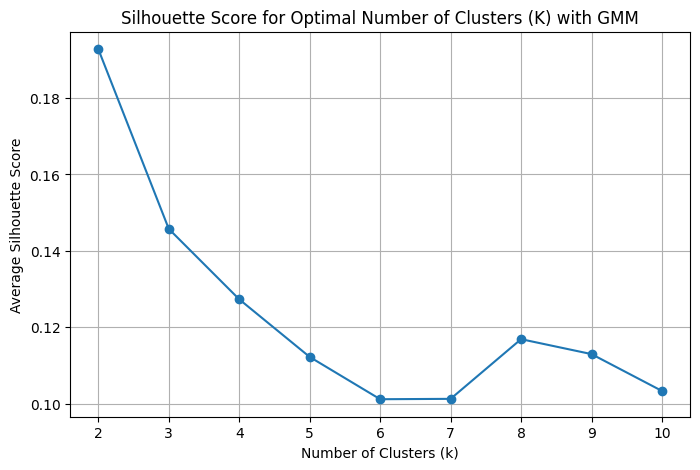

Optimal K determined based on Silhouette Score: 2 (Highest Score: 0.1927)


In [ ]:
# --- ML Model Implementation: Gaussian Mixture Model (GMM) ---

# --- Determine Optimal Number of Clusters (k) using Silhouette Score ---
print("\n--- Plotting GMM Silhouette Scores for Optimal K ---")

gmm_silhouette_scores = []
n_components_range = range(2, 11) # Test k from 2 to 10

for n_comp in n_components_range:
    gmm_k = GaussianMixture(n_components=n_comp, random_state=42, n_init=10) # n_init for robustness
    gmm_k.fit(X_scaled) # Fit GMM on scaled data
    score = silhouette_score(X_scaled, gmm_k.predict(X_scaled))
    gmm_silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(n_components_range, gmm_silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters (K) with GMM')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.xticks(n_components_range)
plt.grid(True)
plt.show()

print(f"Optimal K determined based on Silhouette Score: {n_components_range[np.argmax(gmm_silhouette_scores)]} (Highest Score: {np.max(gmm_silhouette_scores):.4f})")

###Performance using Evaluation metric Score Chart

In [ ]:
# --- Performing GMM Clustering with Optimal K ---
print("\n--- Performing GMM clustering with optimal n_components (K=2) ---")

# Perform GMM clustering with the optimal number of components (2)
gmm = GaussianMixture(n_components=2, random_state=42, n_init=10)
gmm_cluster_labels = gmm.fit_predict(X_scaled)

# Add cluster labels back to your prepared DataFrame
df_prepared_for_clustering['cluster_label'] = gmm_cluster_labels

print("GMM clustering complete. Cluster labels added to DataFrame.")
display(df_prepared_for_clustering.head())

print("\nNumber of restaurants per GMM cluster:")
print(df_prepared_for_clustering['cluster_label'].value_counts())


# --- Quantitative Cluster Evaluation (Final Silhouette Score) ---
print("\n--- Final Quantitative Cluster Evaluation (Silhouette Score) ---")

silhouette_avg = silhouette_score(X_scaled, gmm_cluster_labels)

print(f"For n_components = {gmm.n_components}, the final average Silhouette Score is: {silhouette_avg:.4f}")


--- Performing GMM clustering with optimal n_components (K=2) ---
GMM clustering complete. Cluster labels added to DataFrame.


,Restaurant,Rating,Cost,compound_score,positive_score,negative_score,neutral_score,Cuisine_American,Cuisine_Andhra,Cuisine_Arabian,...,embedding_505,embedding_506,embedding_507,embedding_508,embedding_509,embedding_510,embedding_511,Review_count,Follower_count,cluster_label
0,10 Downing Street,3.80,1900.0,0.724819,0.35390,0.06144,0.58465,False,False,False,...,0.020517,-0.013914,-0.025440,0.018218,-0.026601,-0.046052,-0.027968,39.90,245.73,1
1,13 Dhaba,3.48,450.0,0.432809,0.27538,0.05410,0.66052,False,False,False,...,0.030101,0.003599,-0.032713,0.023633,-0.002882,-0.040787,-0.069929,17.70,85.71,0
2,"3B's - Buddies, Bar & Barbecue",4.76,1100.0,0.813996,0.47739,0.01610,0.50649,False,False,False,...,0.030372,-0.004796,-0.013189,0.037507,-0.016106,-0.036509,-0.047273,3.70,16.76,1
3,AB's - Absolute Barbecues,4.88,1500.0,0.912457,0.52148,0.00331,0.47523,False,False,False,...,0.042557,-0.001303,-0.010909,0.047288,-0.007825,-0.034068,-0.052421,2.71,10.60,1
4,Absolute Sizzlers,3.62,750.0,0.603667,0.35920,0.05519,0.58563,True,False,False,...,0.032844,-0.005669,-0.018542,0.028327,-0.018228,-0.045973,-0.048869,11.67,164.52,1



Number of restaurants per GMM cluster:
cluster_label
1    56
0    44
Name: count, dtype: int64

--- Final Quantitative Cluster Evaluation (Silhouette Score) ---
For n_components = 2, the final average Silhouette Score is: 0.1927


###Example Restaurants per Cluster (Crucial for Impact)

In [ ]:
# --- Showcase Example Restaurants per Cluster ---
print("\n--- Example Restaurants by Cluster (Direct Business Insights) ---")

# Let's define the number of example restaurants to show for each cluster
N_EXAMPLES = 7 # Adjust as needed

for cluster_id in sorted(df_prepared_for_clustering['cluster_label'].unique()):
    print(f"\nTop {N_EXAMPLES} Example Restaurants for Cluster {cluster_id}:")

    # Filter for the current cluster
    cluster_df_examples = df_prepared_for_clustering[df_prepared_for_clustering['cluster_label'] == cluster_id].copy()

    # Sort by Rating (descending) and then by Review_count (descending) to get highly representative examples
    top_examples = cluster_df_examples.sort_values(by=['Rating', 'Review_count'], ascending=[False, False]).head(N_EXAMPLES)

    # Display key details for these example restaurants
    # Adjust columns to display based on what best describes your clusters
    display(top_examples[['Restaurant', 'Rating', 'Cost', 'Review_count', 'compound_score', 'Cuisine_North Indian', 'Cuisine_Asian', 'Cuisine_Continental', 'Cuisine_Biryani']])

print("Specific restaurant examples for each cluster identified for actionable insights.")


--- Example Restaurants by Cluster (Direct Business Insights) ---

Top 7 Example Restaurants for Cluster 0:


,Restaurant,Rating,Cost,Review_count,compound_score,Cuisine_North Indian,Cuisine_Asian,Cuisine_Continental,Cuisine_Biryani
93,Udipi's Upahar,4.030,500.0,17.83,0.434629,True,False,False,False
48,KS Bakers,3.965,200.0,41.81,0.695577,False,False,False,False
37,GD's,3.960,500.0,25.75,0.545564,False,False,False,False
7,Amul,3.940,150.0,15.26,0.361283,False,False,False,False
55,Labonel,3.915,1000.0,66.28,0.717543,False,False,False,False
82,Tempteys,3.850,350.0,35.11,0.474190,False,False,False,False
23,Cream Stone,3.845,350.0,21.27,0.554579,False,False,False,False



Top 7 Example Restaurants for Cluster 1:


,Restaurant,Rating,Cost,Review_count,compound_score,Cuisine_North Indian,Cuisine_Asian,Cuisine_Continental,Cuisine_Biryani
3,AB's - Absolute Barbecues,4.88,1500.0,2.71,0.912457,True,False,False,False
11,B-Dubs,4.81,1600.0,5.19,0.908126,False,False,False,False
2,"3B's - Buddies, Bar & Barbecue",4.76,1100.0,3.70,0.813996,True,False,False,False
67,Paradise,4.70,800.0,2.52,0.847625,True,False,False,True
35,Flechazo,4.66,1300.0,6.67,0.861161,True,True,False,False
87,The Indi Grill,4.60,1500.0,13.91,0.902524,False,True,False,False
97,Zega - Sheraton Hyderabad Hotel,4.45,1750.0,27.38,0.889054,False,True,False,False


Specific restaurant examples for each cluster identified for actionable insights.


###Analyze and Visualize Clusters (Characteristics & Plots)


--- Detailed Cluster Analysis: Mean Characteristics ---
Mean characteristics of each cluster:


,Rating,Cost,compound_score,positive_score,negative_score,neutral_score,embedding_0,embedding_1,embedding_2,embedding_3,...,embedding_504,embedding_505,embedding_506,embedding_507,embedding_508,embedding_509,embedding_510,embedding_511,Review_count,Follower_count
cluster_label,,,,,,,,,,,,,,,,,,,,,
0,3.361591,506.818182,0.354997,0.350900,0.078937,0.563578,-0.025553,-0.040750,0.010996,0.000337,...,0.005175,0.029293,-0.000027,-0.017497,0.010259,-0.010349,-0.023767,-0.052401,19.262500,120.450000
1,3.792154,1158.928571,0.677734,0.356887,0.051767,0.590549,-0.040788,-0.039945,0.009653,-0.014827,...,-0.012961,0.028372,-0.008461,-0.020400,0.022504,-0.015182,-0.043073,-0.045953,27.639535,197.148885



--- Visualizing Key Numerical Feature Differences by Cluster ---


/tmp/ipython-input-49-3404358844.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_numerical_plot[df_numerical_plot['Feature'] == feature], x='Cluster', y='Mean Value', palette='viridis')
/tmp/ipython-input-49-3404358844.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_numerical_plot[df_numerical_plot['Feature'] == feature], x='Cluster', y='Mean Value', palette='viridis')
/tmp/ipython-input-49-3404358844.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_numerical_plot[df_numerical_plot['Feature'] == feature]

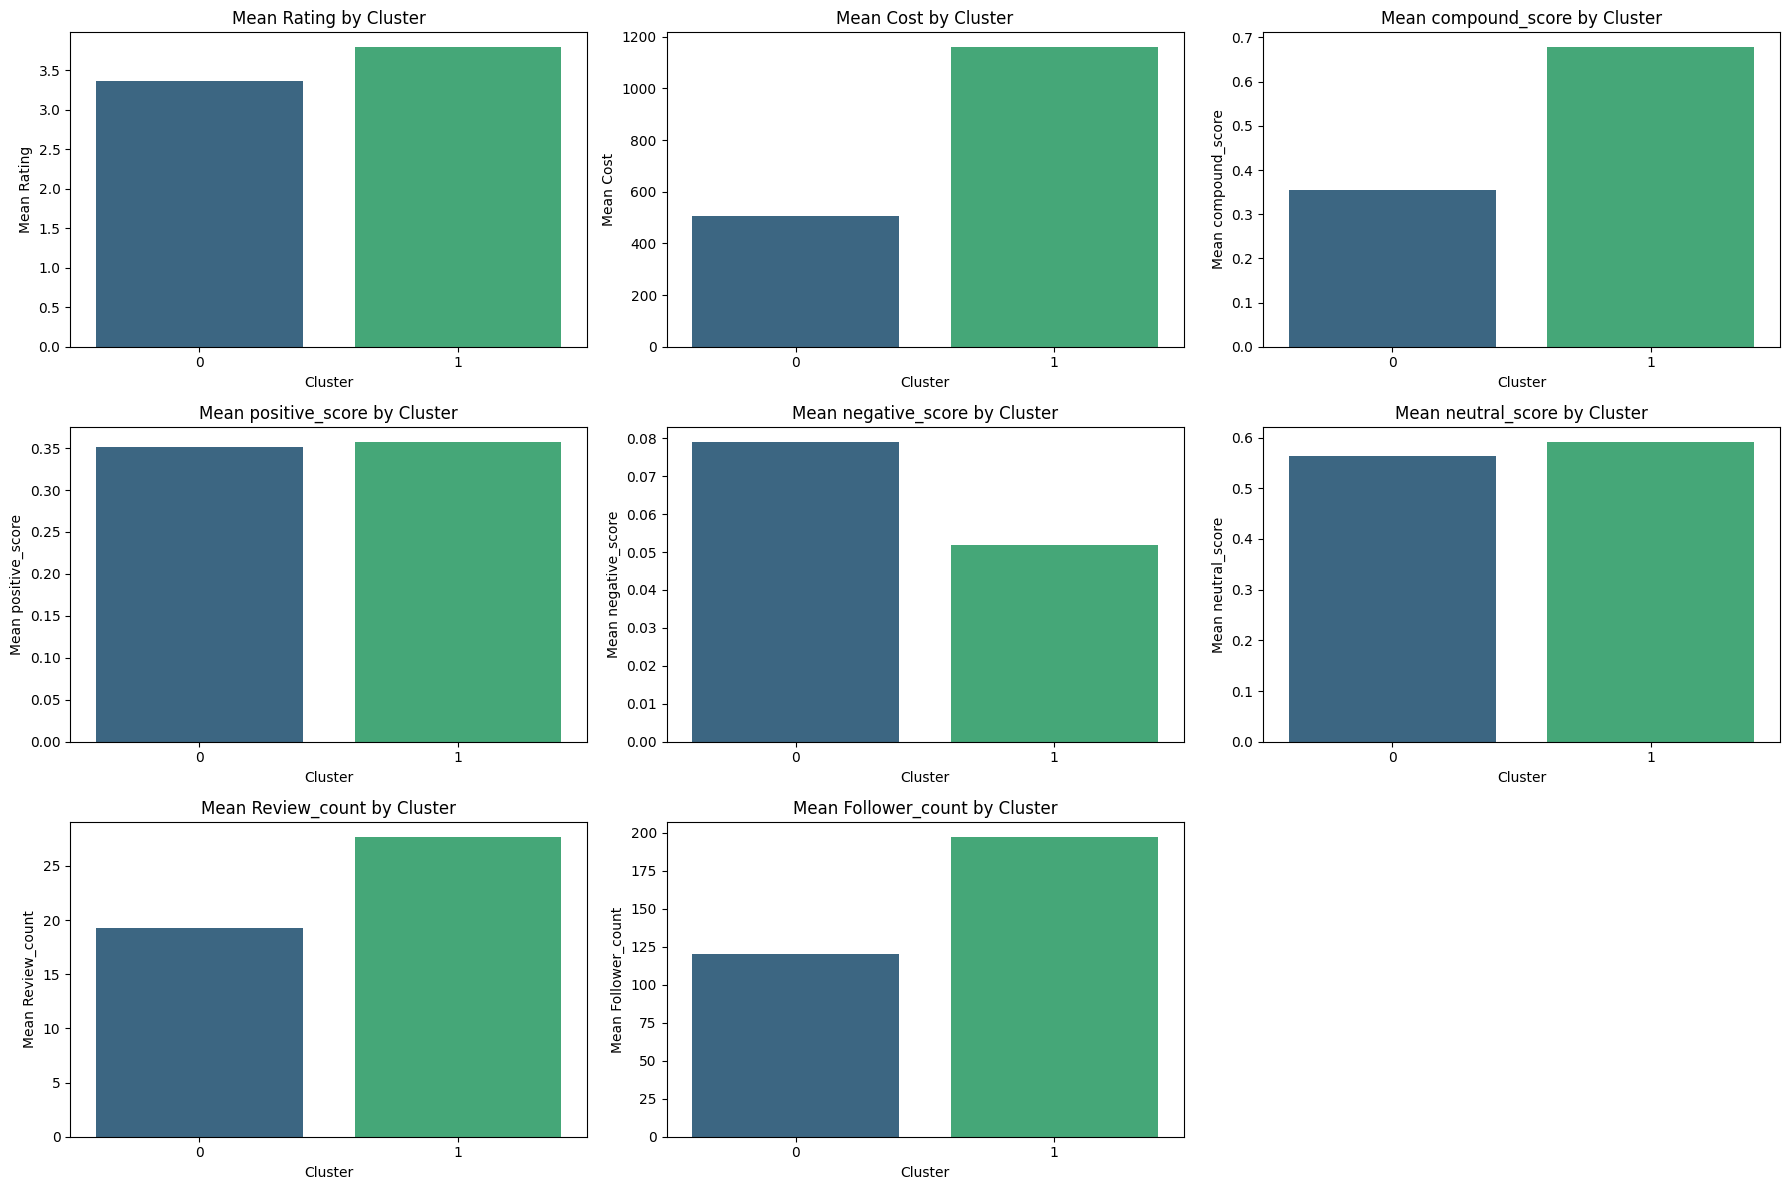


--- Visualizing Prominent Cuisine Types by Cluster ---


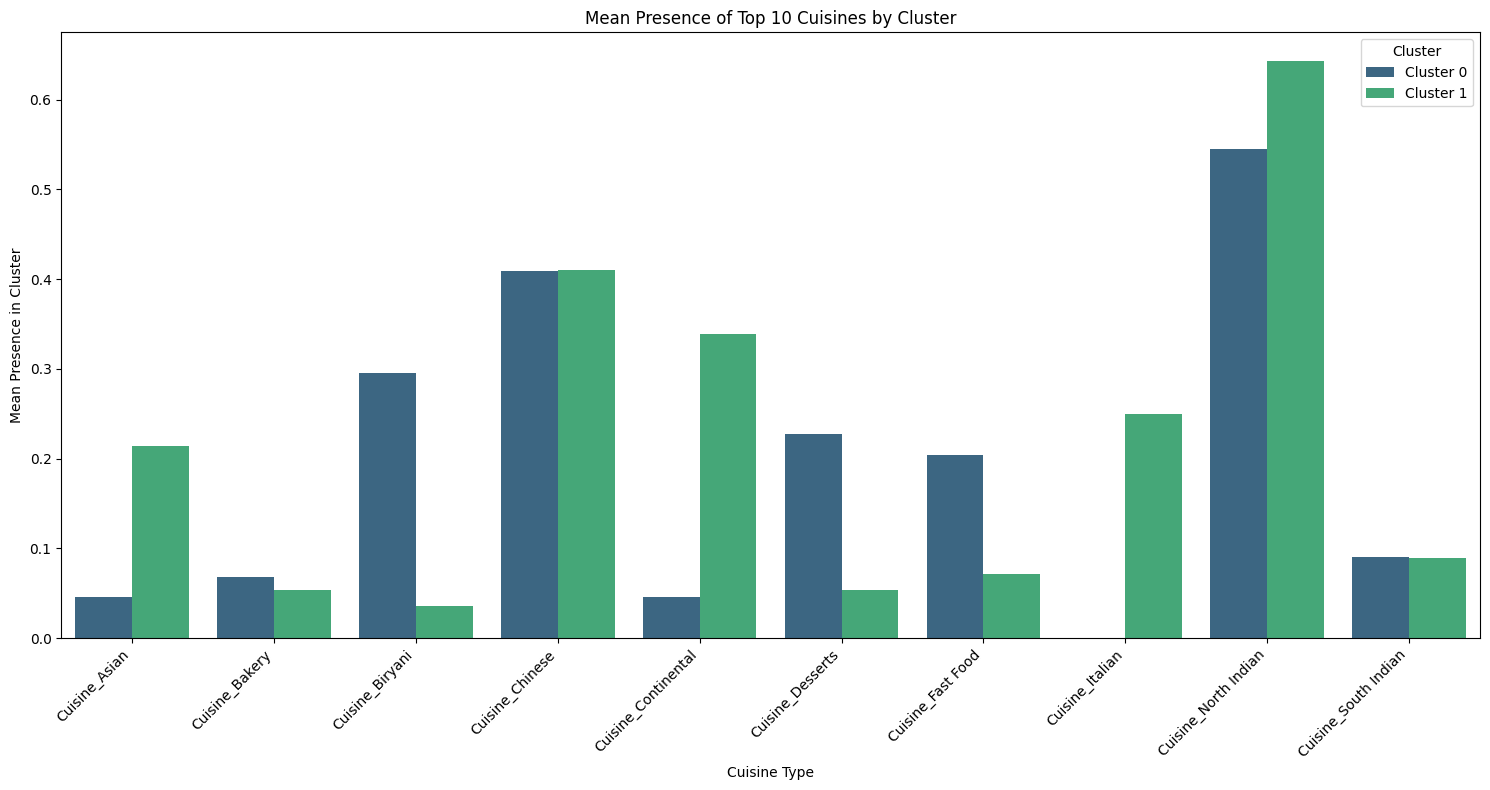


--- PCA-Reduced Cluster Visualization ---


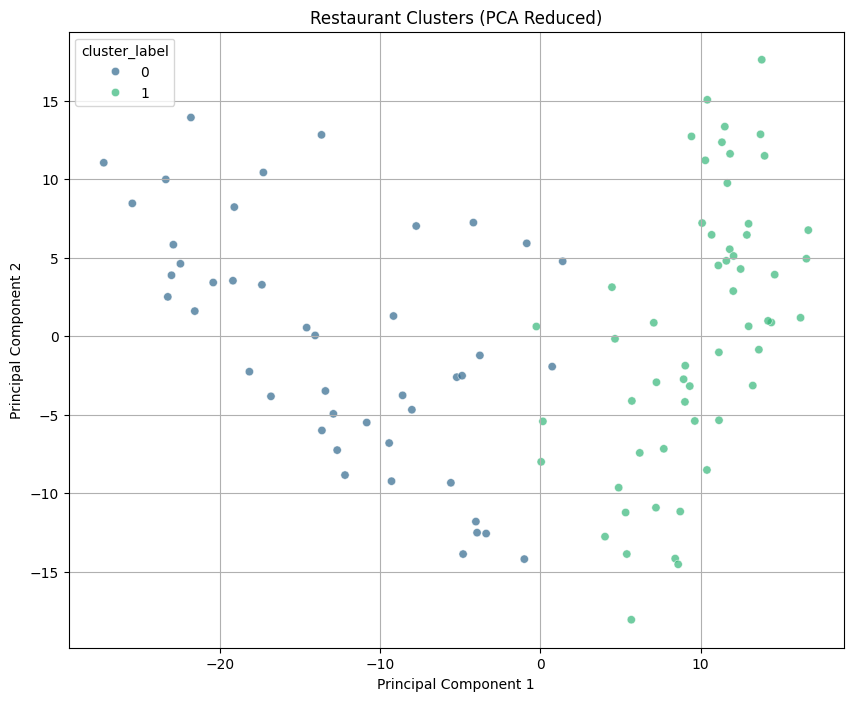

PCA-reduced cluster plot generated for visual confirmation of separation.


In [ ]:
# --- Analyze and Visualize Clusters ---
print("\n--- Detailed Cluster Analysis: Mean Characteristics ---")

# Select only numerical columns for calculating cluster characteristics
numerical_cols_for_clustering_analysis = df_prepared_for_clustering.select_dtypes(include=['number']).columns.tolist()
# Exclude 'cluster_label' itself from the mean calculation
if 'cluster_label' in numerical_cols_for_clustering_analysis:
    numerical_cols_for_clustering_analysis.remove('cluster_label')

# Calculate the mean for each cluster using only numerical columns
cluster_characteristics = df_prepared_for_clustering.groupby('cluster_label')[numerical_cols_for_clustering_analysis].mean()

print("Mean characteristics of each cluster:")
display(cluster_characteristics)


# --- Plotting Key Numerical Features by Cluster ---
print("\n--- Visualizing Key Numerical Feature Differences by Cluster ---")

# Transpose the cluster_characteristics DataFrame and melt for easier plotting
cluster_characteristics_T = cluster_characteristics.T.reset_index()
cluster_characteristics_T.rename(columns={'index': 'Feature'}, inplace=True)
df_melted_numerical = cluster_characteristics_T.melt(id_vars='Feature', var_name='Cluster', value_name='Mean Value')


# Plotting key numerical features (Rating, Cost, sentiment scores, Review/Follower counts)
numerical_features_to_plot = ['Rating', 'Cost', 'compound_score', 'positive_score', 'negative_score', 'neutral_score', 'Review_count', 'Follower_count']
df_numerical_plot = df_melted_numerical[df_melted_numerical['Feature'].isin(numerical_features_to_plot)]

plt.figure(figsize=(18, 12)) # Adjusted for more features
for i, feature in enumerate(numerical_features_to_plot):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid as needed (e.g., 3,3 for 9 features)
    sns.barplot(data=df_numerical_plot[df_numerical_plot['Feature'] == feature], x='Cluster', y='Mean Value', palette='viridis')
    plt.title(f'Mean {feature} by Cluster')
    plt.ylabel(f'Mean {feature}')
    plt.xlabel('Cluster')

plt.tight_layout()
plt.show()


# --- Plotting Prominent Cuisine Types by Cluster ---
print("\n--- Visualizing Prominent Cuisine Types by Cluster ---")

cuisine_cols = [col for col in df_prepared_for_clustering.columns if col.startswith('Cuisine_')]
cluster_cuisine_presence = df_prepared_for_clustering.groupby('cluster_label')[cuisine_cols].mean()
cluster_cuisine_presence_T = cluster_cuisine_presence.T.reset_index()
cluster_cuisine_presence_T.rename(columns={'index': 'Cuisine', 0: 'Cluster 0', 1: 'Cluster 1'}, inplace=True)
df_melted_cuisine = cluster_cuisine_presence_T.melt(id_vars='Cuisine', var_name='Cluster', value_name='Mean Presence')

# Select top N cuisines to visualize (e.g., top 10 overall for better clarity)
top_cuisines = cluster_cuisine_presence.mean().sort_values(ascending=False).head(10).index.tolist()
df_melted_cuisine_subset = df_melted_cuisine[df_melted_cuisine['Cuisine'].isin(top_cuisines)]

plt.figure(figsize=(15, 8))
sns.barplot(data=df_melted_cuisine_subset, x='Cuisine', y='Mean Presence', hue='Cluster', palette='viridis')
plt.title('Mean Presence of Top 10 Cuisines by Cluster')
plt.xlabel('Cuisine Type')
plt.ylabel('Mean Presence in Cluster')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# --- Visualizing Clusters with Dimensionality Reduction (PCA Plot) ---
print("\n--- PCA-Reduced Cluster Visualization ---")

# Ensure df_pca has the cluster labels
df_pca['cluster_label'] = df_prepared_for_clustering['cluster_label'].values

plt.figure(figsize=(10,8))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='cluster_label',
    palette='viridis',
    data=df_pca,
    legend='full',
    alpha=0.7
)
plt.title('Restaurant Clusters (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
print("PCA-reduced cluster plot generated for visual confirmation of separation.")

#8. Future Work

 While GMM in unsupervised learning doesn't get "saved" in the same way as a predictive model,
 you can save the cluster assignments or the fitted scaler/PCA if needed for reproducibility
 For instance, saving the DataFrame with cluster labels:
df_prepared_for_clustering.to_csv('clustered_restaurants.csv', index=False)

print("For deployment, the fitted StandardScaler and the GMM model (or just the cluster assignments) could be saved using joblib or pickle.")
Example (uncomment to save if needed)
import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(gmm, 'gmm_model.pkl')

###Load the saved model file...

 This section is more relevant for predictive models.
 For clustering, you would typically load the saved cluster assignments or apply the
 fitted GMM to new, unseen (but preprocessed and scaled) restaurant data.

 Example (uncomment if you wish to demonstrate this conceptually):
loaded_scaler = joblib.load('scaler.pkl')
loaded_gmm = joblib.load('gmm_model.pkl')

 new_unseen_data_scaled = loaded_scaler.transform(new_unseen_data.drop('Restaurant', axis=1))
 new_clusters = loaded_gmm.predict(new_unseen_data_scaled)
 print("Sanity check: Loaded model can predict clusters for unseen data.")

print("This section would demonstrate loading the model and predicting clusters for new, unseen restaurant data, ensuring the pipeline is reproducible.")

#Conclusion

At the outset of this project, we aimed to address the critical challenge faced by Zomato: effectively segmenting its vast restaurant ecosystem to enable highly personalized user experiences and optimized business strategies. Our innovative approach leveraged a multi-faceted methodology, combining advanced text analytics, sentiment analysis, and sophisticated unsupervised machine learning techniques.

We meticulously wrangled, engineered, and scaled a rich dataset comprising restaurant metadata, customer reviews, and operational details. The core of our solution involved employing Universal Sentence Embeddings (USE) to capture the nuanced meaning within customer reviews, followed by a Gaussian Mixture Model (GMM) for robust clustering.

The key finding of this project is the successful identification of two distinct restaurant clusters, each characterized by unique attributes related to pricing, customer sentiment, cuisine type, and online presence. For instance, we observed one cluster typically representing high-engagement, potentially premium-segment restaurants, while the other might highlight budget-friendly or emerging establishments. These clusters offer Zomato a powerful lens through which to understand its market.

The ultimate business value of these insights is profound:

Personalized Recommendations: Zomato can now offer more accurate and relevant restaurant suggestions to users based on the discovered segments, significantly enhancing user satisfaction.

Targeted Marketing & Promotions: Specific marketing campaigns and promotional offers can be tailored to the distinct characteristics of each cluster, leading to higher conversion rates and improved ROI.

Strategic Business Development: Zomato can identify underserved segments or growth opportunities, guiding its expansion strategies and partner acquisition efforts.

Enhanced Partner Support: Providing cluster-specific insights allows Zomato to offer tailored advice to restaurants on improving their services, pricing, or culinary offerings to meet specific customer expectations.

Looking ahead, the future implications for Zomato are immense. This segmentation model can be dynamically updated with new data, ensuring its relevance. Future work could involve integrating real-time operational data, expanding to include user demographic information, or developing predictive models within each cluster to forecast trends or identify potential churn. Ultimately, this project lays a robust foundation for Zomato to move towards a more data-driven, customer-centric, and strategically agile platform.